In [2]:
# Importing the Libraries
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np  
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/Walmart-DataSet/Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Preprocessing Steps

In [5]:
# Checking the null values
df.isnull().sum() 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Checking the number of rows and columns
df.shape

(6435, 8)

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [10]:
# Convert date to datetime format 
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [13]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [15]:
# Outlier Analyis
# Exclude the Holiday_Flag, Date column because Holiday_Flag is categorical data 

columns=['Store', 'Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']

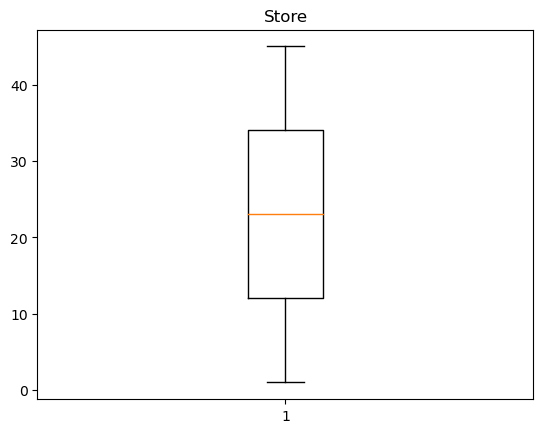

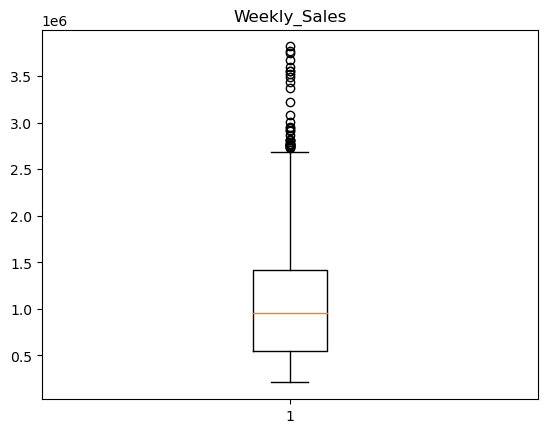

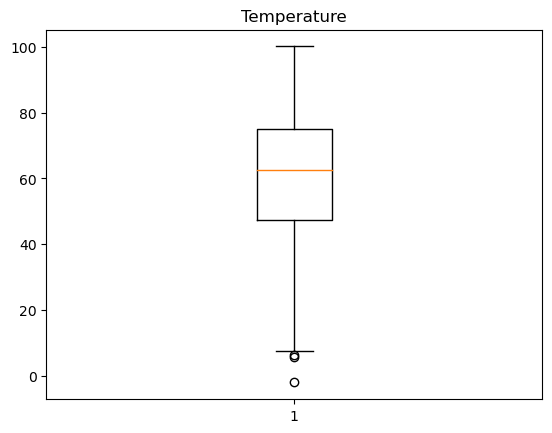

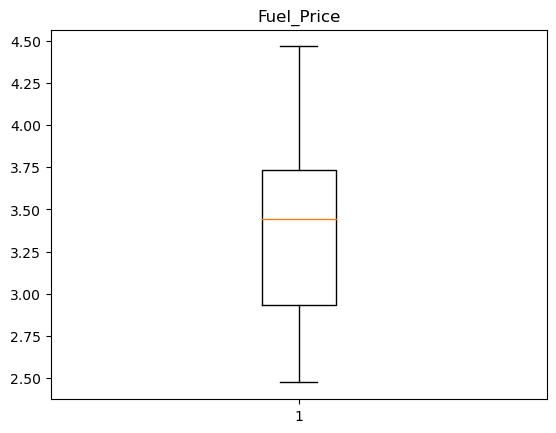

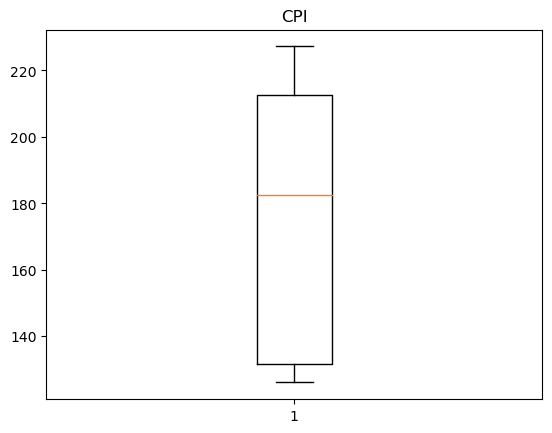

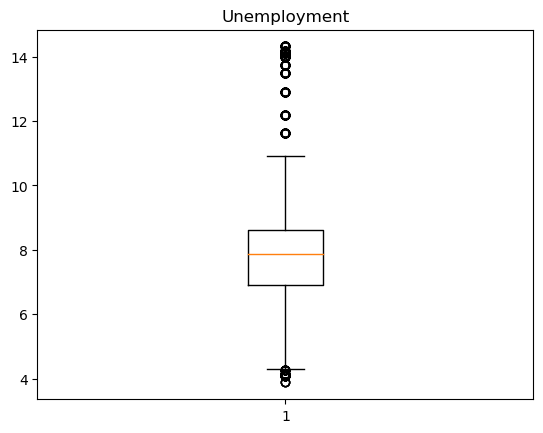

In [16]:
for col in columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [21]:
# creating a list of columns that have outliers
out_col=['Weekly_Sales','Temperature', 'Unemployment']

In [22]:
# Removing the outliers from out_cols using IQR method
for col in out_col:
  if df[col].dtype!="object":
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[col]>=LL) & (df[col]<=UL)]

In [23]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


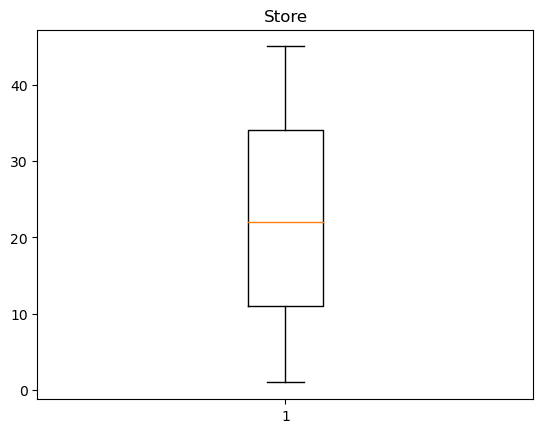

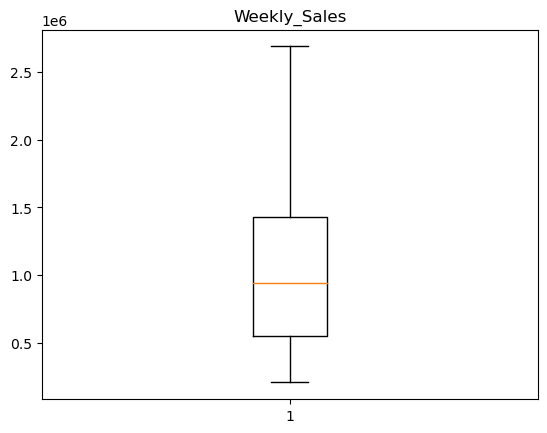

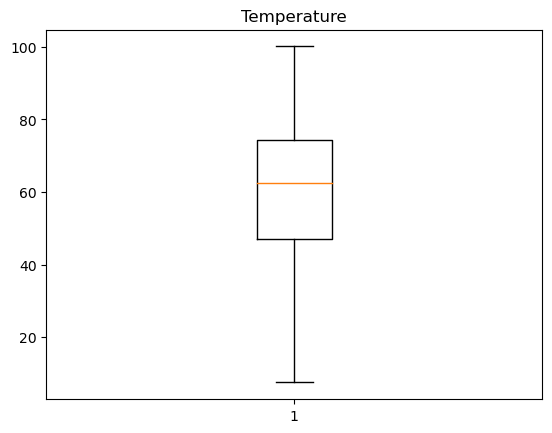

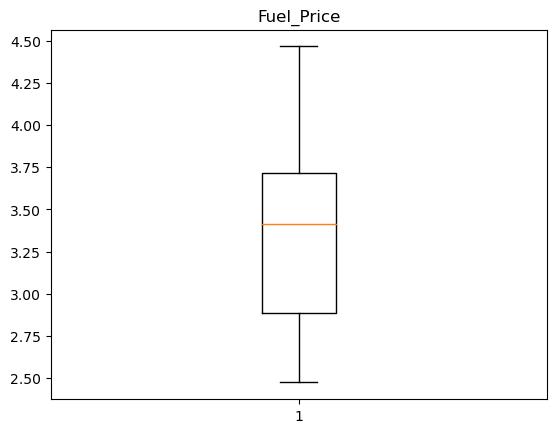

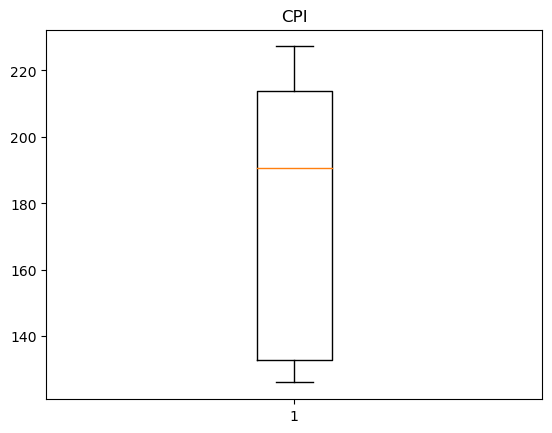

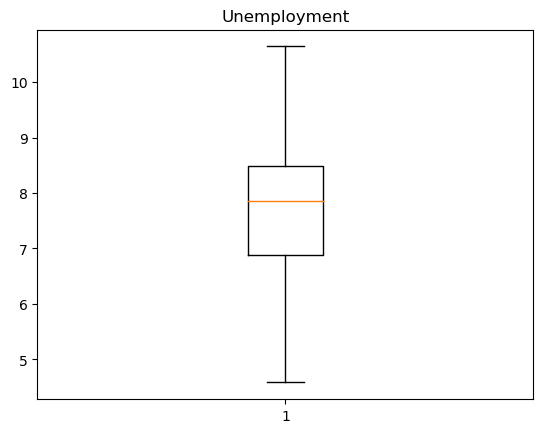

In [24]:
# Outlier Analyis
for col in columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Now we are exploring the data by Independent variables with the target variable which is Weekly sales

#  Store V/s Weekly Sales

In [25]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

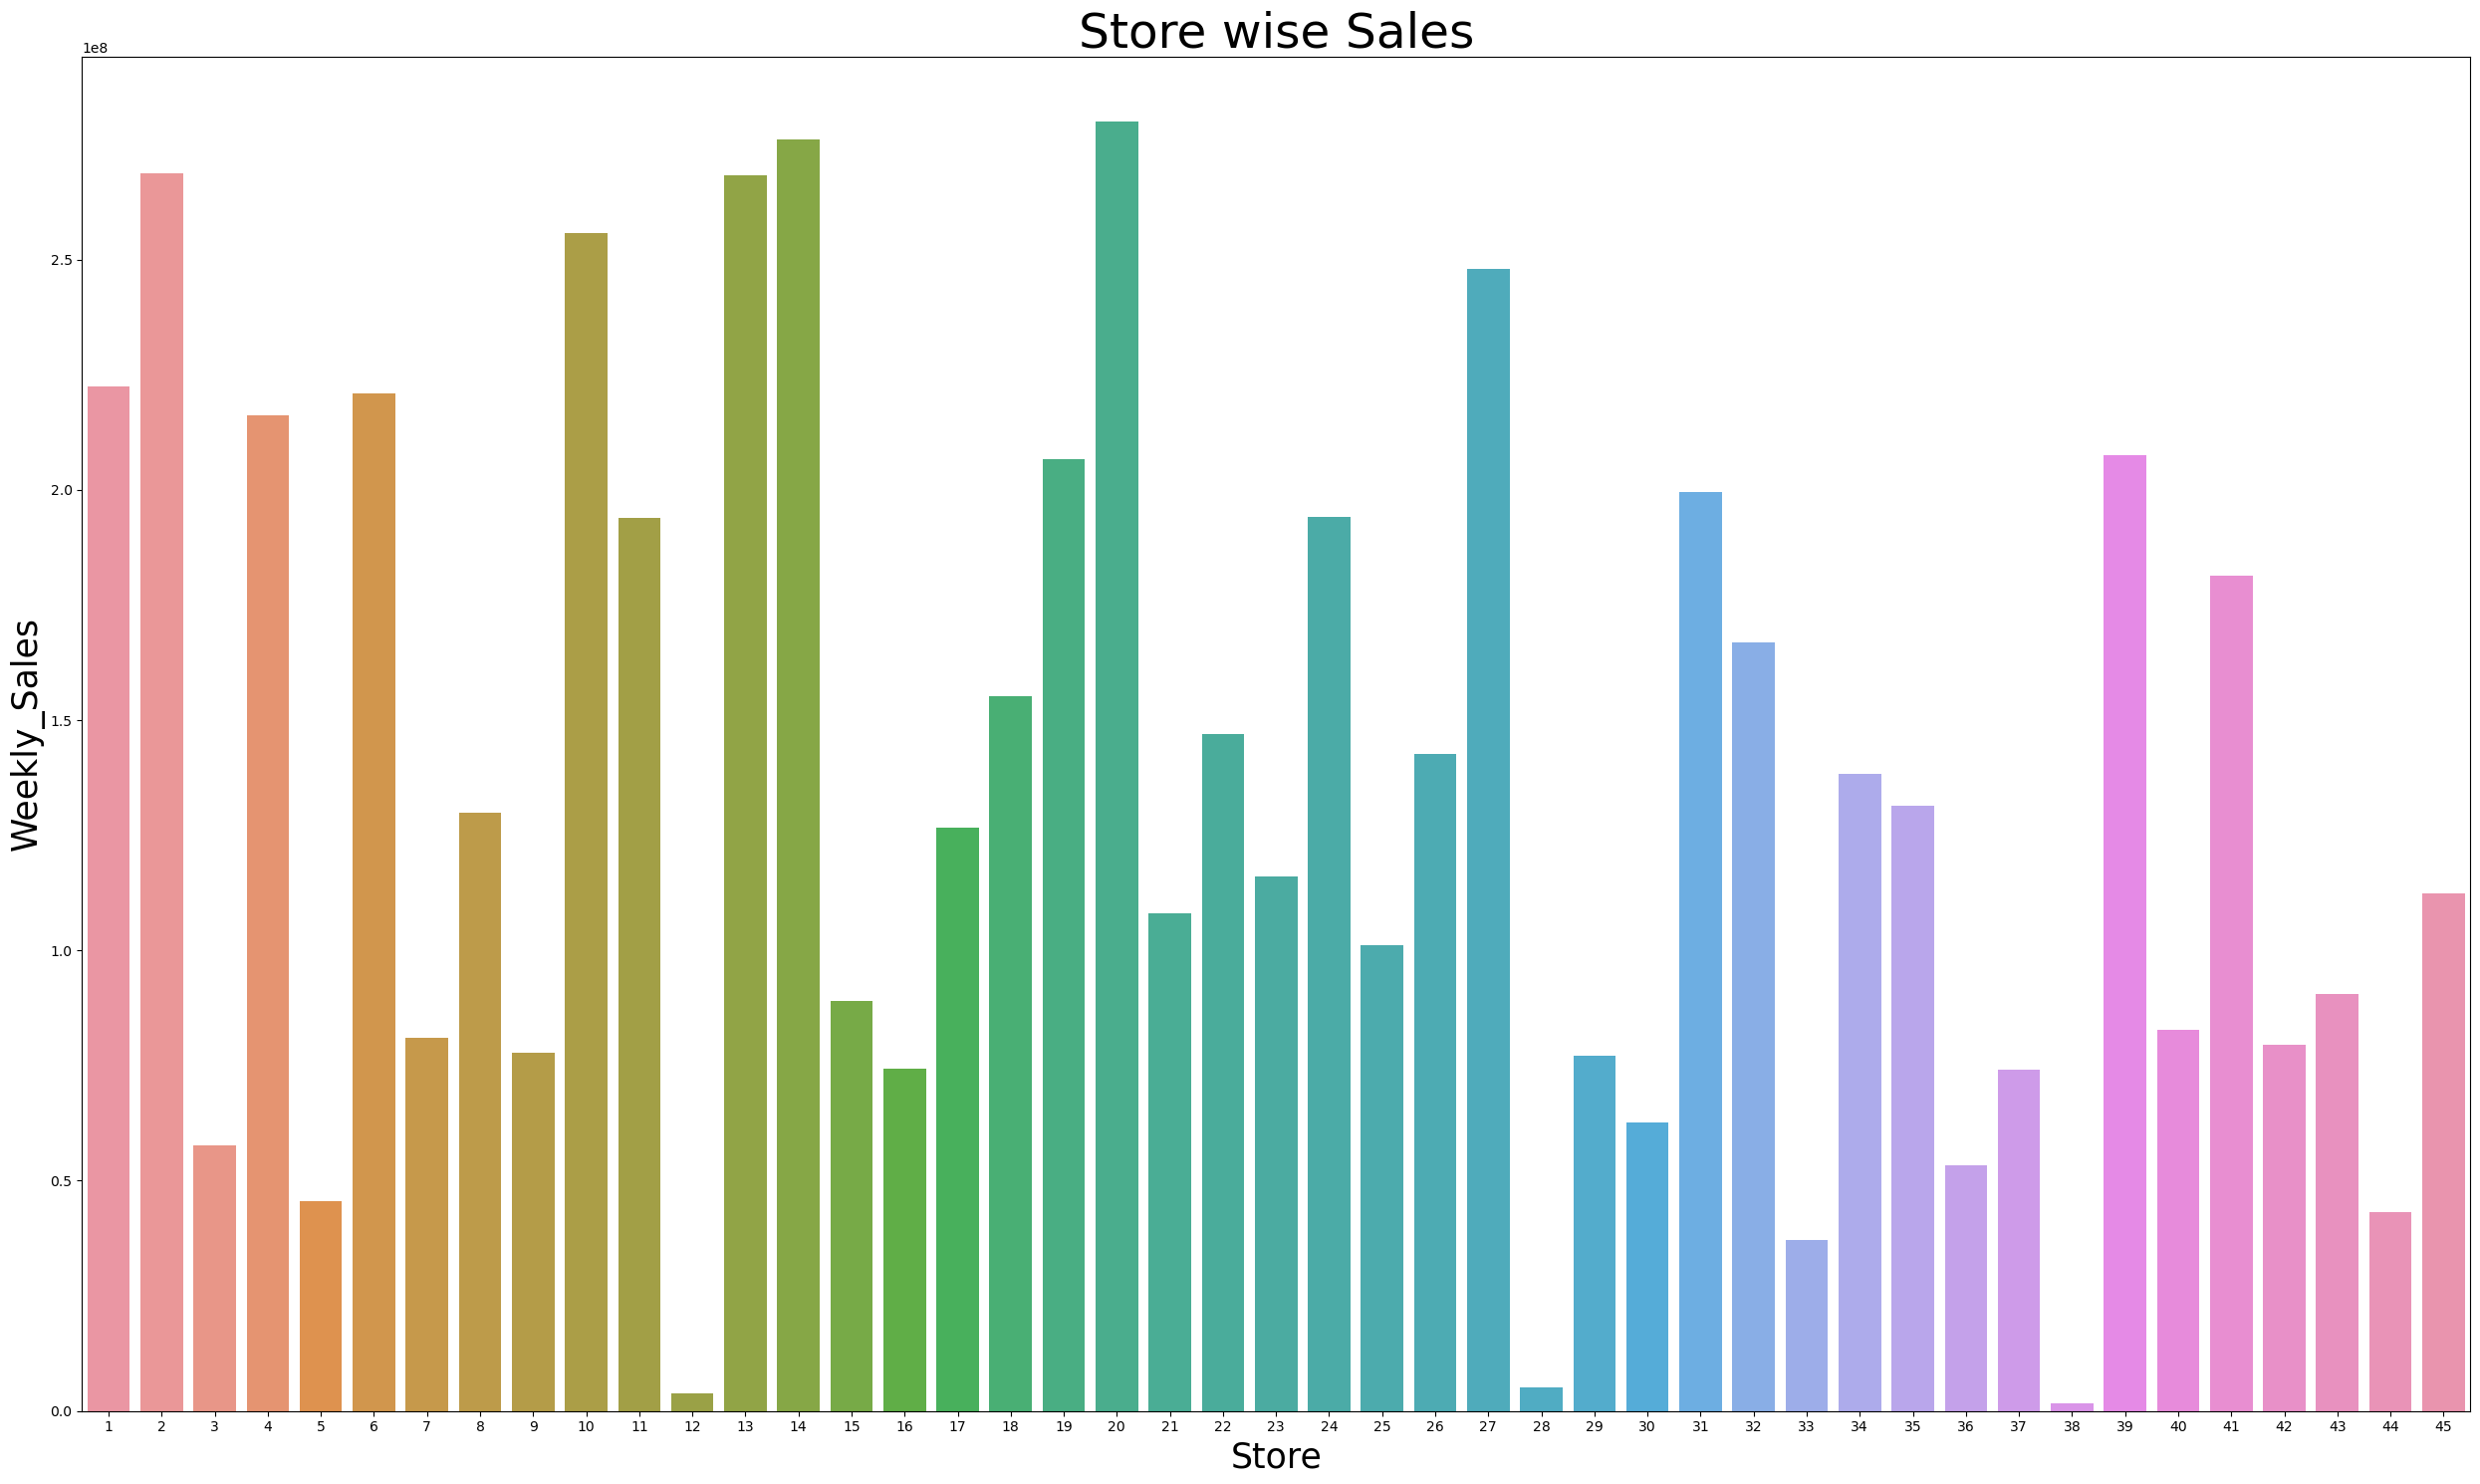

In [31]:
plt.figure(figsize=(25,15))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
plt.xlabel('Store',fontsize=25)
plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

In [ ]:
# Inference

# Since we have 45 stores we cant take all the store sales. so we tried to plot top and botttom 10 stores saleswise.

In [33]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
top_10_Sale_Store

,Store,Weekly_Sales
19,20,2.800237e+08
13,14,2.761276e+08
1,2,2.687221e+08
12,13,2.682025e+08
9,10,2.556789e+08
26,27,2.480387e+08
0,1,2.224028e+08
5,6,2.210286e+08
3,4,2.161943e+08
38,39,2.074455e+08


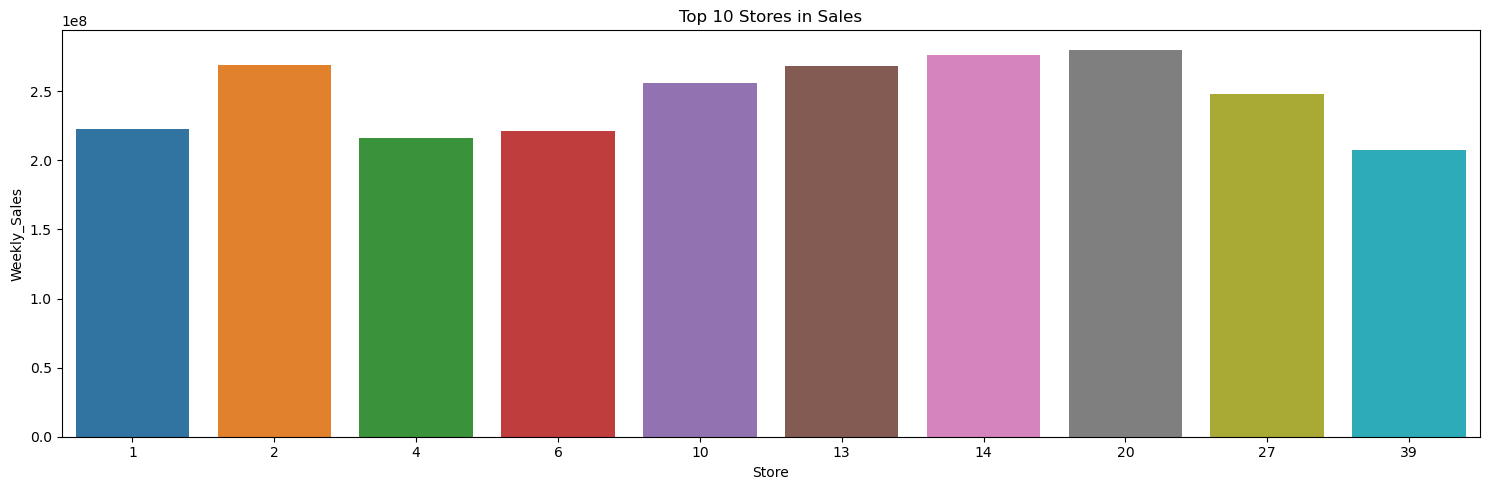

In [34]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) 
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

# Inference:

The Stores 4,20,14 is having the highest sales in top 10 stores segment

The Stores 6,39 is having the Lowest sales in top 10 stores segment

In [35]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest  weekly sales
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store 

,Store,Weekly_Sales
37,38,1741896.51
11,12,3850386.42
27,28,5026062.83
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32


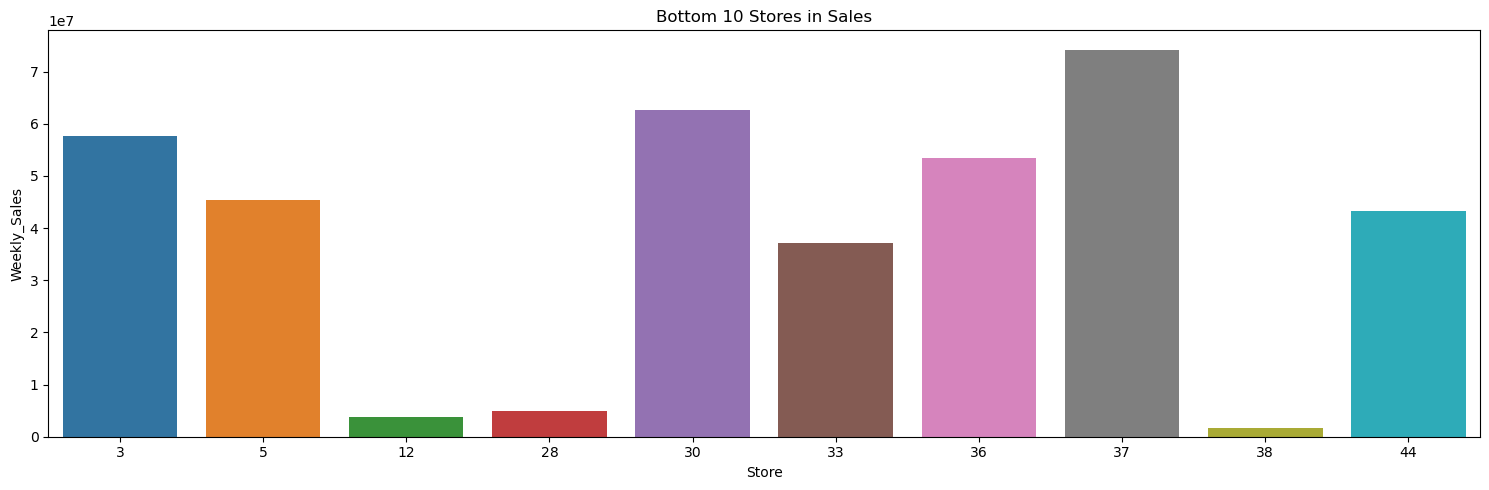

In [36]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

# Inference:

The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment

The Stores 33,44 is having the highest sales in Bottom 10 stores segment

# Date V/s Weekly Sales


In [37]:
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True)

In [38]:
df_date_sales.shape

(143, 2)

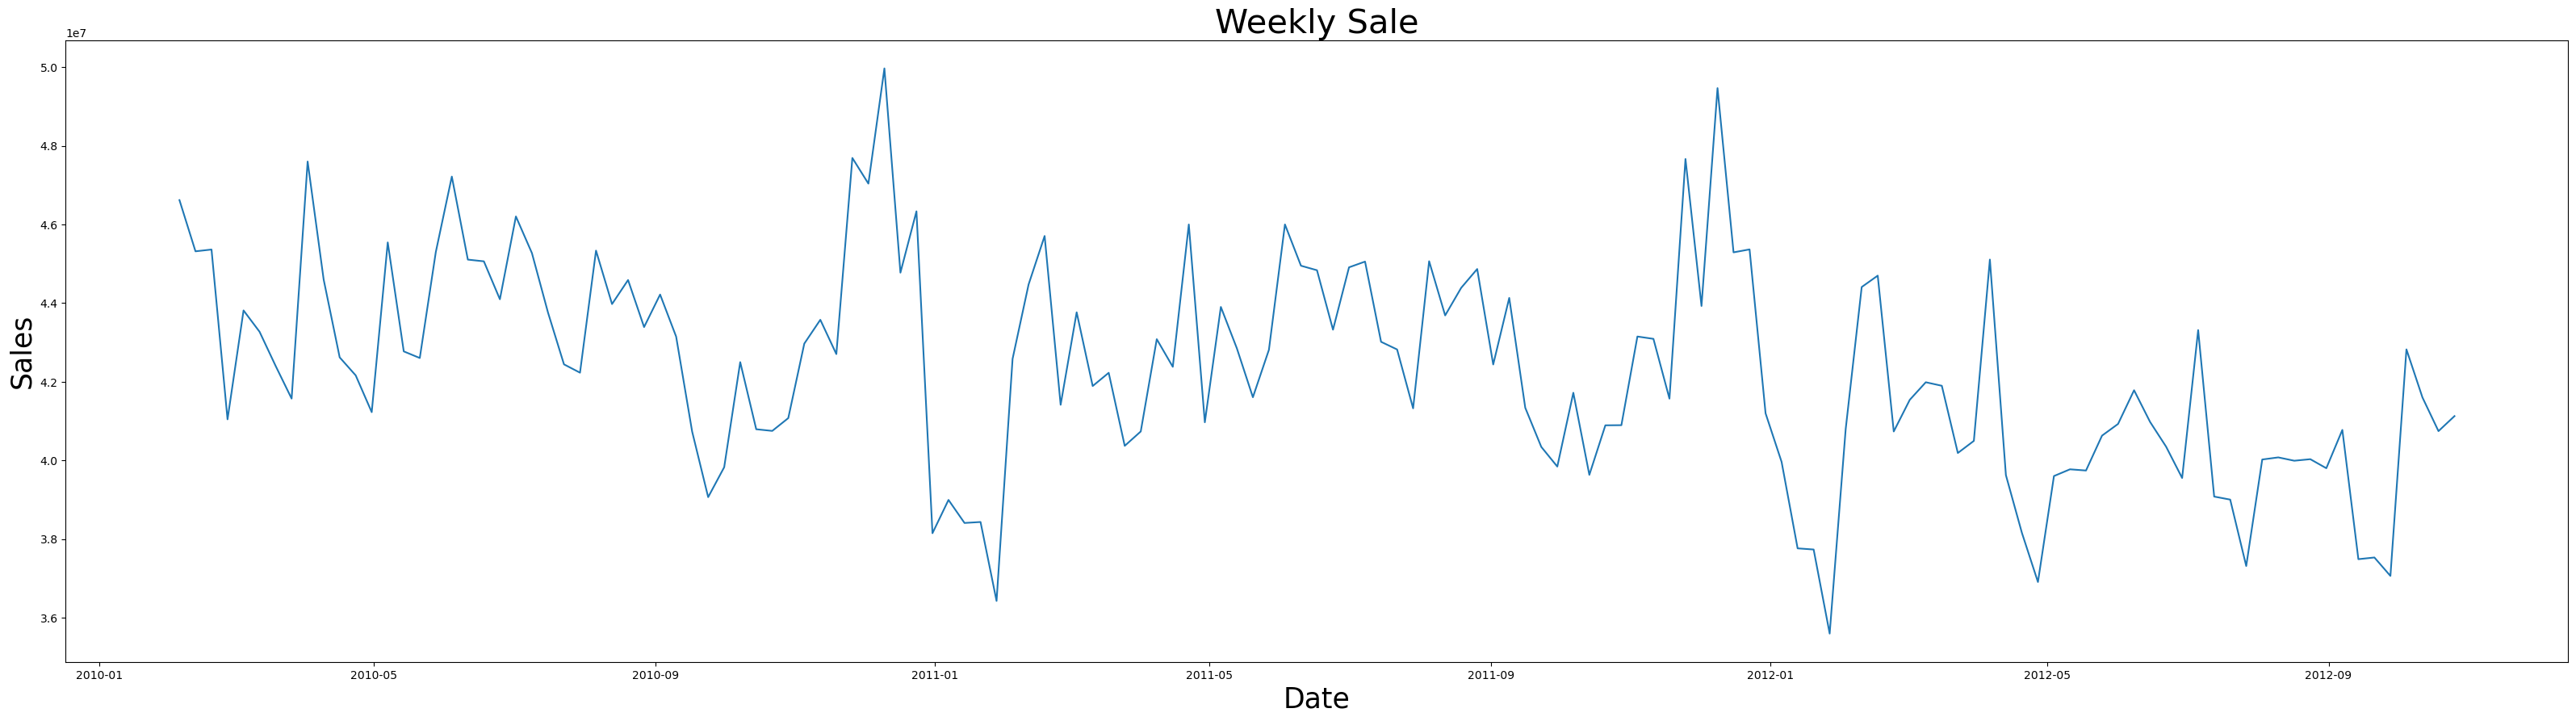

In [39]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales)
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)
plt.show()

# Inference:

Weekly Sales most of weeks are consolidating expect some quarters

# sales v/s Holidays

In [40]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5437
1     402
Name: count, dtype: int64

In [41]:
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [42]:
df_Hf_Sales

,Holiday_Flag,Weekly_Sales
0,0,5.614771e+09
1,1,4.369580e+08


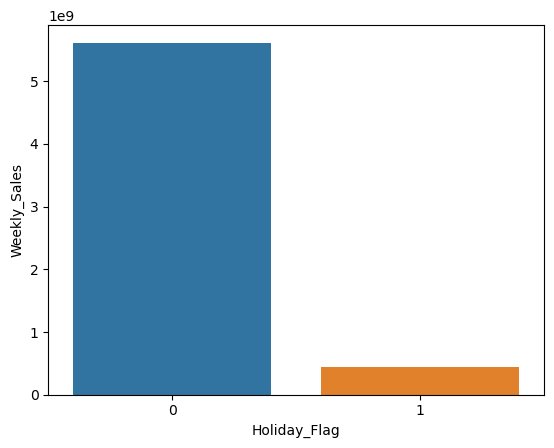

In [44]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales)
plt.show()

# Inference:

The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days

# Temperature v/s sales

In [48]:
df['Temperature'].min()

7.46

In [49]:
df['Temperature'].max()

100.14

In [50]:
bins = [0,25,50,75,100] # Creating bins to sort the tempeture values
labels = ['0-25','26-50','51-75','76-100'] # Labels

In [51]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels)

In [52]:
df['Temp_Category'].value_counts()

Temp_Category
51-75     2722
26-50     1510
76-100    1398
0-25       207
Name: count, dtype: int64

In [53]:
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()


In [54]:
df_temp_sales

,Temp_Category,Weekly_Sales
0,0-25,1.888781e+08
1,26-50,1.636008e+09
2,51-75,2.843057e+09
3,76-100,1.383206e+09


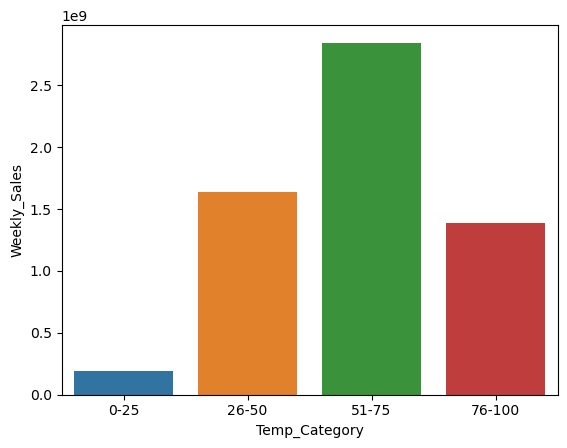

In [55]:
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)
plt.show()

# Inference:
    
Stores perform well in moderate temp that is 26-50

Sales went peaks in Moderate to High temp that is 51-75

Sales went down in Very High and Low temp that is 0-25 & 76-100

# Fuel_Price V/s Sales


In [81]:
df['Fuel_Price'].min()

2.472

In [82]:
df['Fuel_Price'].max()

4.468

In [83]:
bins1 = [2,2.5,3,3.5,4,4.5]
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [84]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)

In [85]:
df['Fuel_Price_Cat'].value_counts()

Fuel_Price_Cat
3.6-4      2359
2.6-3      1833
3.1-3.5    1349
4.1-4.5     297
2-2.5         1
Name: count, dtype: int64

In [86]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()

In [87]:
df_Fuel_Price_Sales

,Fuel_Price_Cat,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.895000e+09
2,3.1-3.5,1.394989e+09
3,3.6-4,2.441899e+09
4,4.1-4.5,3.193698e+08


<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

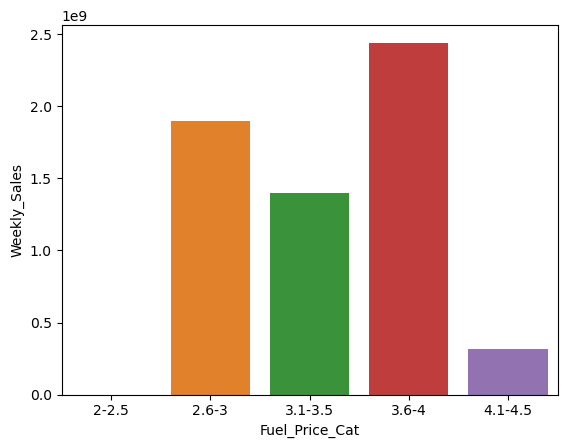

In [88]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)


# Inference:

When the fuel prices are modereate the performance of stores are also moderatly high

But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.


# CPI v/s Sales

In [59]:
df['CPI'].min()

126.064

In [60]:
df['CPI'].max()

227.2328068

In [61]:
bins2=[125,155,185,215,245]
labels2=['125-155','156-185','186-215','216-245',]

In [62]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [63]:
df['CPI_cat']

0       186-215
1       186-215
2       186-215
3       186-215
4       186-215
         ...   
6430    186-215
6431    186-215
6432    186-215
6433    186-215
6434    186-215
Name: CPI_cat, Length: 5839, dtype: category
Categories (4, object): ['125-155' < '156-185' < '186-215' < '216-245']

In [64]:
df['CPI_cat'].value_counts()

CPI_cat
125-155    2565
186-215    1999
216-245    1158
156-185     117
Name: count, dtype: int64

In [65]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

In [66]:
df_Cpi_Sales

,CPI_cat,Weekly_Sales
0,125-155,2.765673e+09
1,156-185,1.656582e+08
2,186-215,2.001044e+09
3,216-245,1.119353e+09


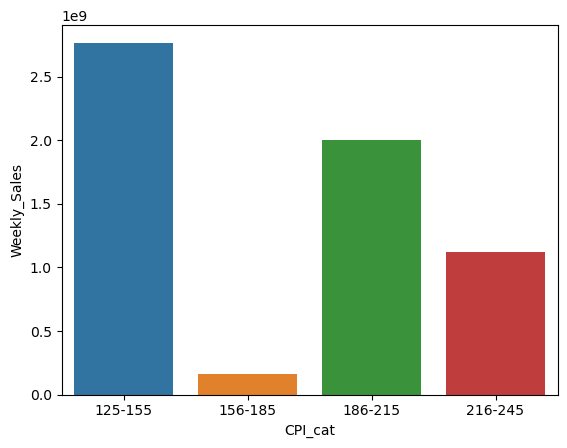

In [67]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)
plt.show()

# Inference:

when inflation is lower the performance of stores are high

in third level when inflation is high the people may scared for future prices and bought more grocery for future needs also
eventually when the inflation went peaks the sales are went down

# Unemployment V/s Sales

In [68]:
df['Unemployment'].min()

4.584

In [69]:
df['Unemployment'].max()

10.641

In [70]:
bins3=[4,6,8,10,12]
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [71]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3)

In [72]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
6.1-8      2772
8.1-10     2379
4-6         476
10.1-12     212
Name: count, dtype: int64

In [74]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

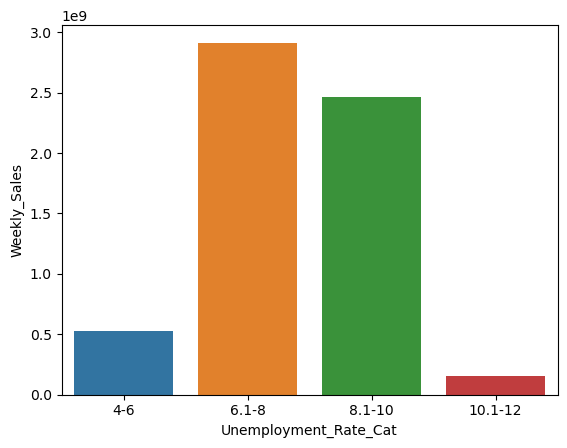

In [75]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

# Inference

When the Unemployment rate is between the 6 to 10 the stores are performing well

But whenever the Unemployment rate is increasing the sales went down

# Stastical Analysis


In [89]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [95]:
df['Quarters'] = df['Date'].dt.to_period("Q")
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [96]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [97]:
corr_df = df_Encode.corr()

<Axes: >

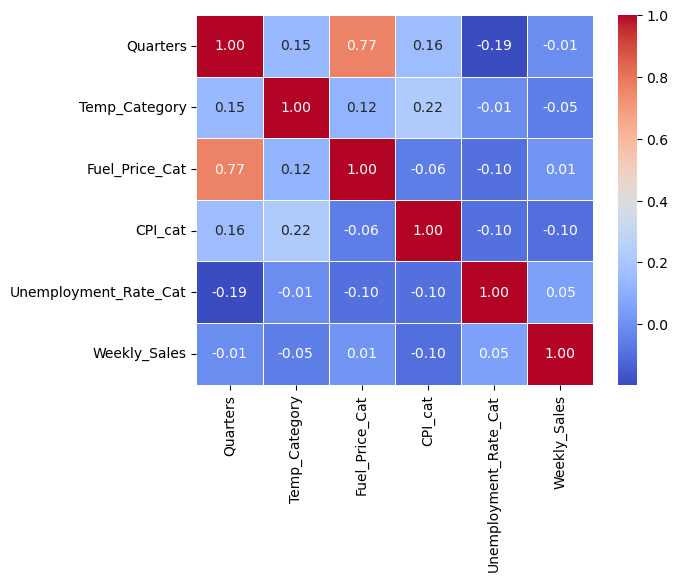

In [98]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

# Inference:
    
Quarters and Fuel Price having high correlation

Because the fuel prices are also depend on the seasonal changes

# Questions - Answers

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

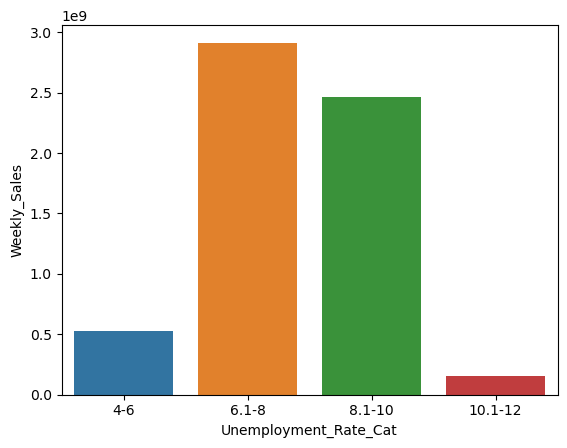

In [100]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

Inference:

we can see that where the Unemployment Rate is too low and too high the sales are affected compared to moderate Unemployment Rate.
So we need to find out the store which are suffering the most in this Unemployment rate category.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5839 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  5839 non-null   int64         
 1   Date                   5839 non-null   datetime64[ns]
 2   Weekly_Sales           5839 non-null   float64       
 3   Holiday_Flag           5839 non-null   int64         
 4   Temperature            5839 non-null   float64       
 5   Fuel_Price             5839 non-null   float64       
 6   CPI                    5839 non-null   float64       
 7   Unemployment           5839 non-null   float64       
 8   Temp_Category          5837 non-null   category      
 9   CPI_cat                5839 non-null   category      
 10  Unemployment_Rate_Cat  5839 non-null   category      
 11  Fuel_Price_Cat         5839 non-null   category      
 12  Quarters               5839 non-null   period[Q-DEC] 
dtypes: categ

In [103]:
from sklearn.preprocessing import LabelEncoder

In [105]:
label_encoder=LabelEncoder()
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat'])

In [106]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
2    2772
3    2379
1     476
0     212
Name: count, dtype: int64

In [107]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [108]:
sales_unemp_store

,Store,Weekly_Sales
0,4,1.052361e+08
1,5,1.416884e+07
2,6,4.684711e+07
3,8,3.923392e+07
4,9,2.397403e+07
5,12,3.850386e+06
6,13,6.152466e+07
7,16,2.016068e+06
8,17,1.623276e+07
9,23,1.160417e+08


In [109]:
# Since We have 17 stores that are suffering. but i took only 5 stros which suffering more than others stores which are in those 17 stores
print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate is listed Below : 


,Store,Weekly_Sales
14,38,1741896.51
7,16,2016067.98
12,33,2299155.24
5,12,3850386.42
10,28,5026062.83


## b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [110]:
# Weekly Sales
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

In [111]:
# Temperature
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True)
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


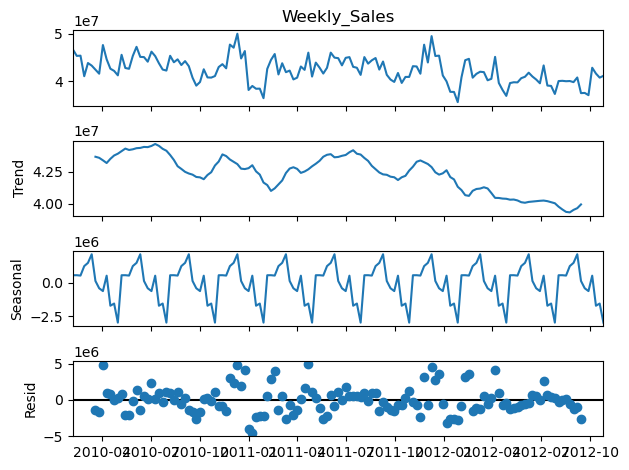

In [112]:
print(sales_decomposition.plot())

Figure(640x480)


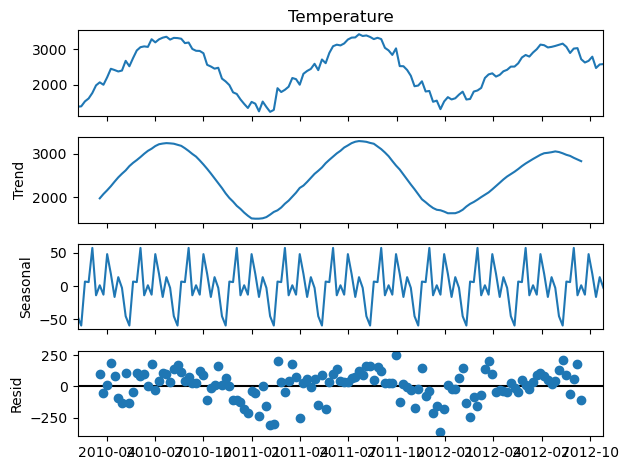

In [113]:
print(Temperature_decomposition.plot())

# Inference

Regarding the Temperature data, a seasonal downward trend is observed starting from September 2010 until January 2011. Subsequently, there's a gradual increase. However, from September 2011, temperatures start to decline again.

In summary, there appears to be an inverse relationship between Temperature and Weekly Sales. When temperatures decrease, weekly sales tend to rise, and vice versa. This inverse correlation is evident from September 2011 to January 2012, as well as from September 2011 to January 2012.

# c. Does temperature affect the weekly sales in any manner?

In [114]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

<Axes: >

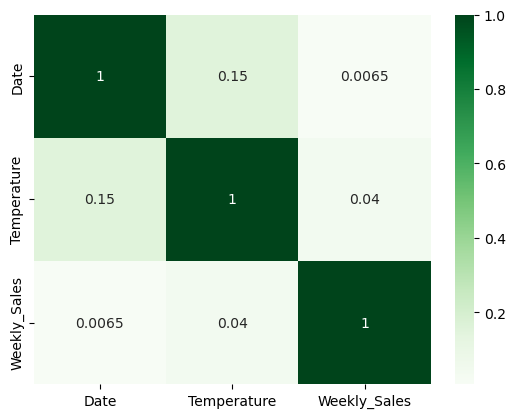

In [117]:
sns.heatmap(df_temp_sales.corr(),annot=True,cmap='Greens')

# Inference:
    

so the answer for qustion c: Yes the Temperature is affecting the Weekly Sales

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [118]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

In [120]:
df_cpi_sales_correlation =df_cpi_sales.corr()

<Axes: >

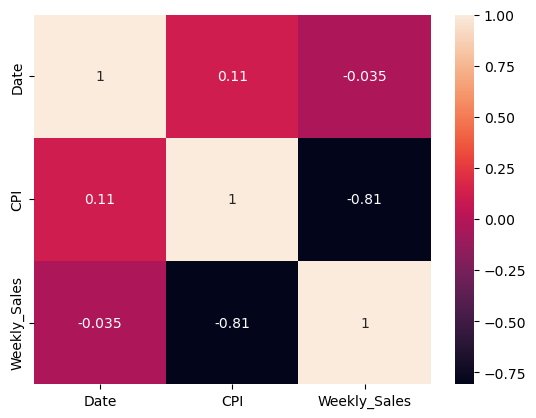

In [121]:
sns.heatmap(df_cpi_sales_correlation,annot=True)

# Inference:
    
There is a nagative correlation between the CPI and weekly sales

so the answer for qustion D: Yes there is a Nagative correlation and the CPI is affecting the Weekly Sales
we can see that in below graph as well. when the CPI increasing the sales are down

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

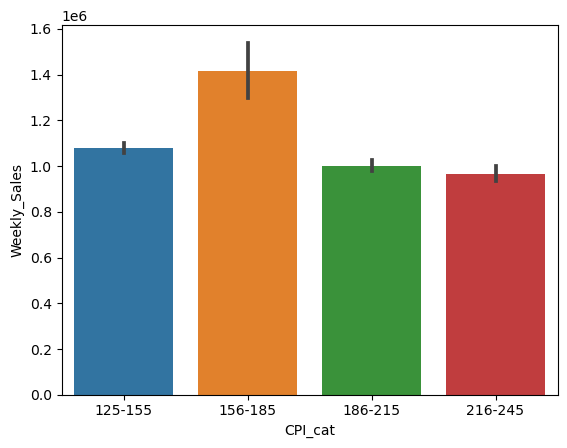

In [123]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

# e. Top performing stores according to the historical data.

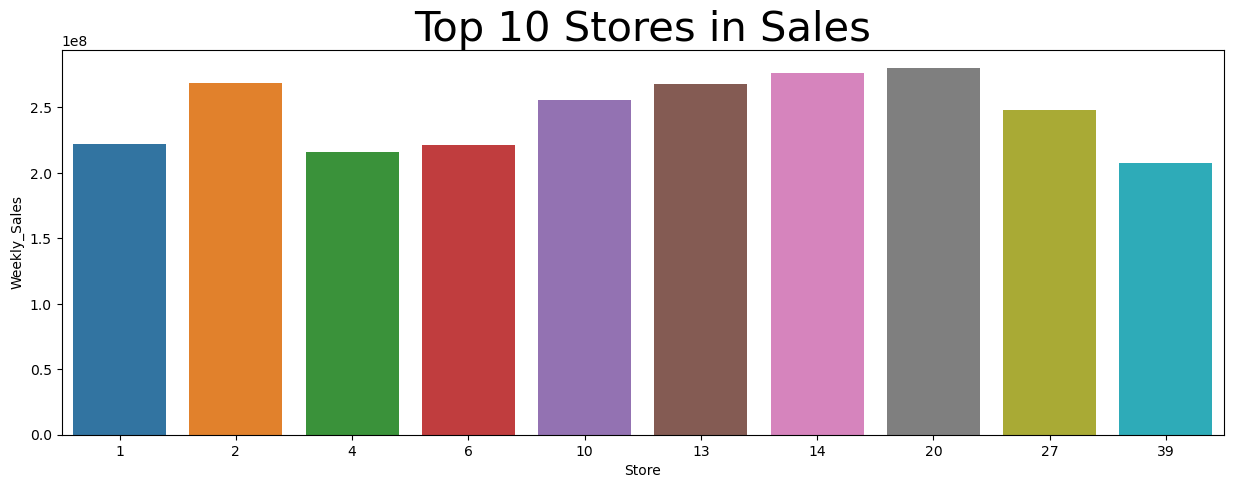

In [124]:
# plotting the top 10 stores
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

# Inference:
    
The Stores 20,14 is having the highest sales in top 10 stores segment

The Store 39 is having the Lowest sales in top 10 stores segment

# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

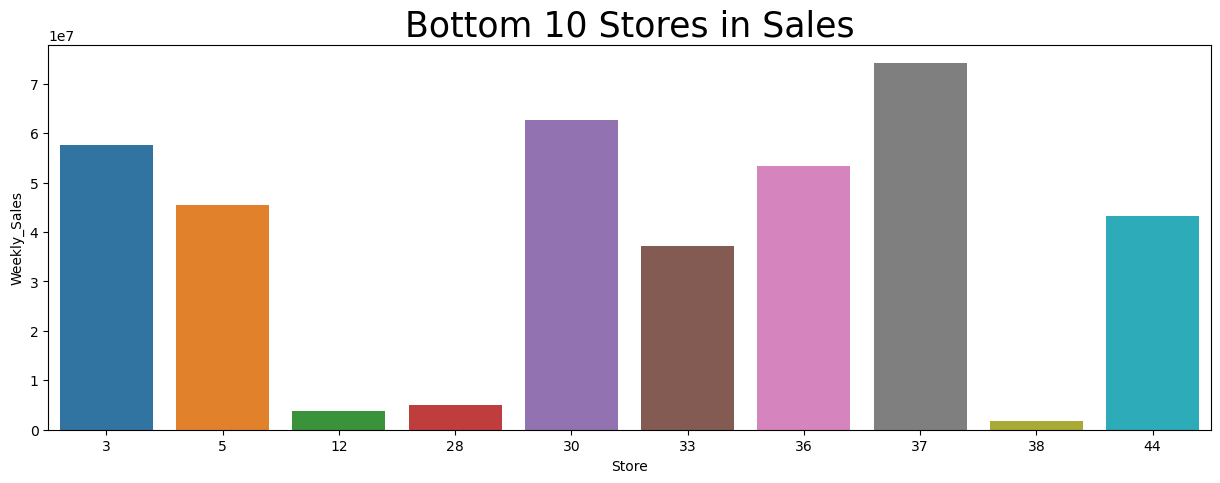

In [125]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales',fontsize=25)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

# Inference:

The Store 37 is having the highest sales in Bottom 10 stores segment

The Stores 38 is having the lowest sales in Bottom 10 stores segment

# Finding The significance difference

In [126]:
# For signficant difference between top and bottom performing stores
# we will use t-test weather it has a significant difference or not

In [127]:
from scipy.stats import ttest_ind
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [128]:
p_value

1.0973608139893526e-12

There is a significant difference between top-performing and worst-performing stores.

P-value: 1.0973608139893526e-12

# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

# Forecasting sales for wallmart stores using ARIMA Model

In [130]:
df['Store'].value_counts()

Store
1     143
34    143
24    143
25    143
29    143
30    143
31    143
32    143
33    143
35    143
21    143
36    143
37    143
39    143
41    143
42    143
43    143
44    143
22    143
45    143
9     143
18    143
3     143
16    143
15    143
5     143
19    143
11    143
8     143
6     142
17    142
26    142
7     142
2     141
27    141
14    139
10    138
13    137
20    136
4     107
40     87
23     86
38      4
28      4
12      4
Name: count, dtype: int64

In [131]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_Category,CPI_cat,Unemployment_Rate_Cat,Fuel_Price_Cat,Quarters
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,26-50,186-215,3,2.6-3,2010Q1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,26-50,186-215,3,2.6-3,2010Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,26-50,186-215,3,2.6-3,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26-50,186-215,3,2.6-3,2010Q1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,26-50,186-215,3,2.6-3,2010Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,51-75,186-215,3,3.6-4,2012Q3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,51-75,186-215,3,3.6-4,2012Q4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,51-75,186-215,3,3.6-4,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,51-75,186-215,3,3.6-4,2012Q4


In [132]:
# Excluding all the varibales.. and considering the date and sales data for model building
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [133]:
df_stores_sales.set_index('Date',inplace=True)

In [134]:
# importing the adfuller for check the data stationarity
from statsmodels.tsa.stattools import adfuller 

In [142]:
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    print(out.to_string())

In [143]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -1.212873
p-value                   0.668034
# lags used              12.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770


In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

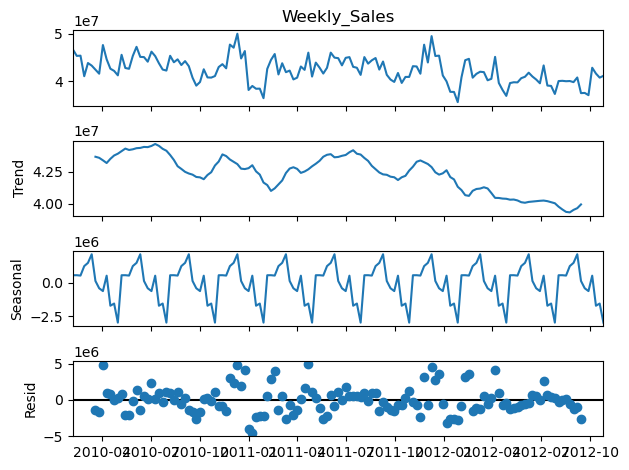

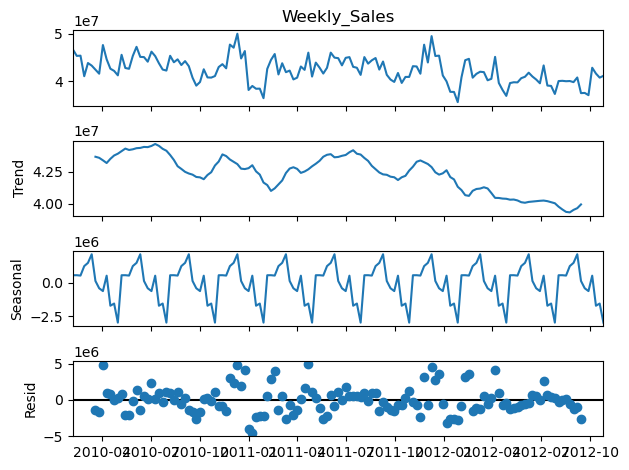

In [147]:
decomposition.plot()

In [148]:
mean1=df_stores_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=df_stores_sales.rolling(window=10).std() # Creating the Rolling standard deviation

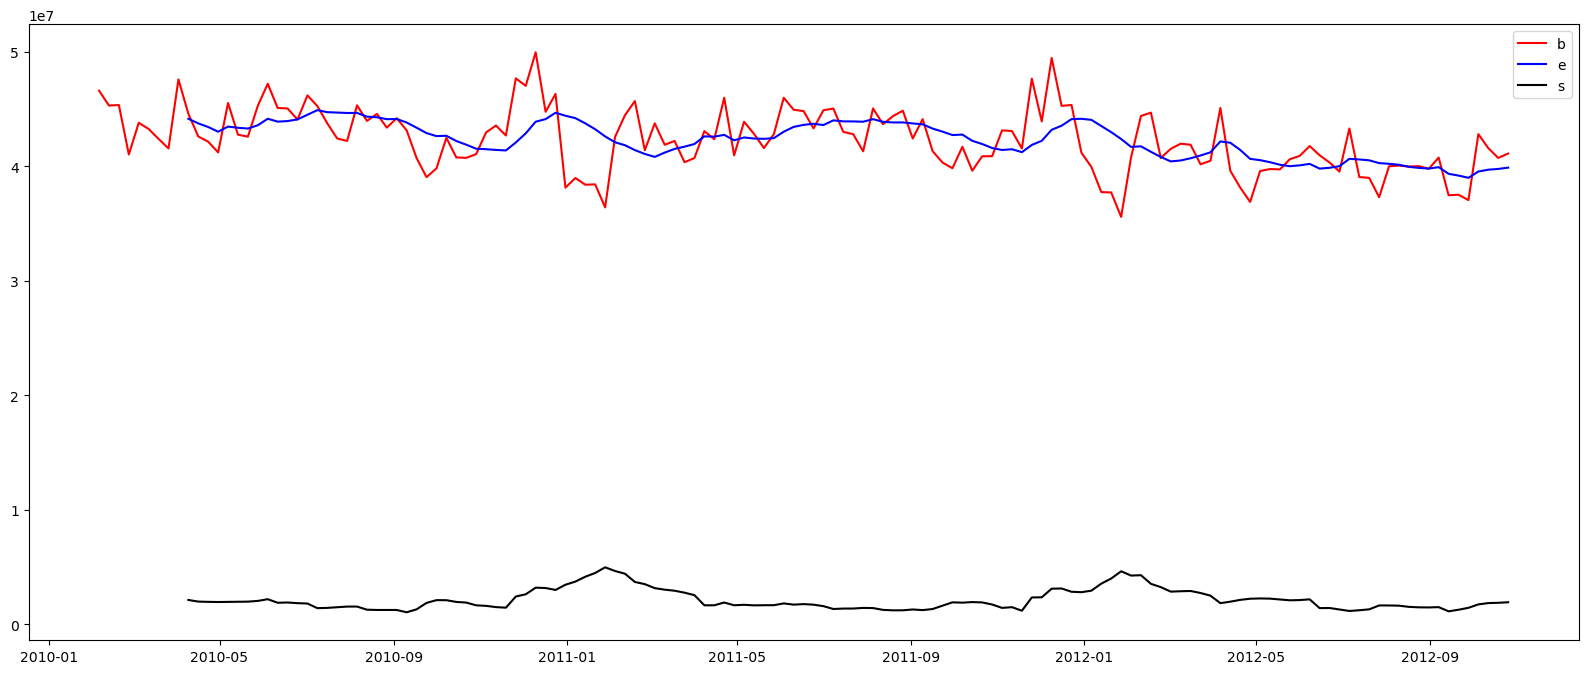

In [149]:
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show()

In [151]:
# Mean and sales are alomost close

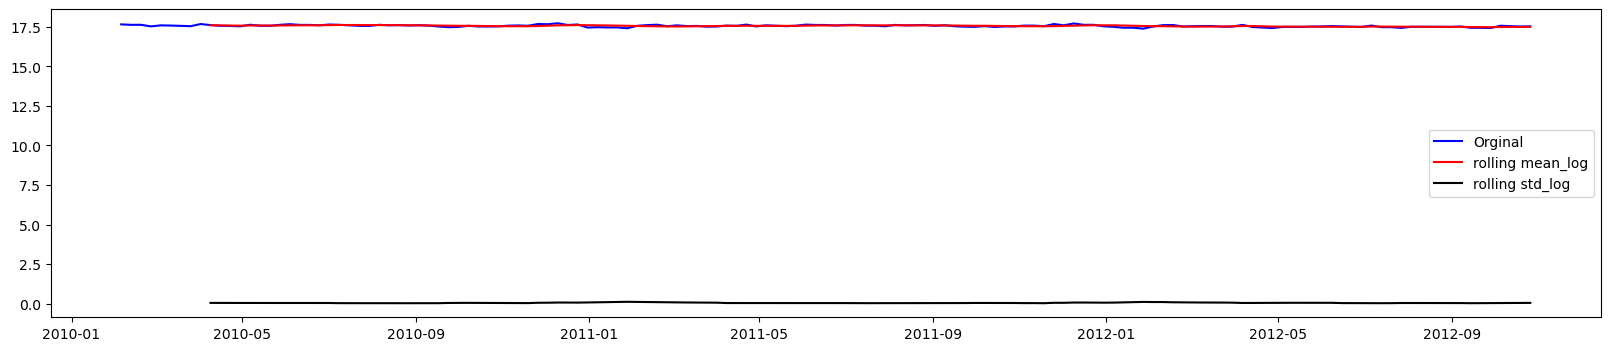

In [153]:
df_log = np.log(df_stores_sales)
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend()
plt.show()

In [154]:
df_new = df_log - mean_log

In [155]:
df_new

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-0.050585
2012-10-05,0.080171
2012-10-12,0.047327


In [156]:
df_new.dropna(inplace = True)

In [158]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf

In [159]:
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

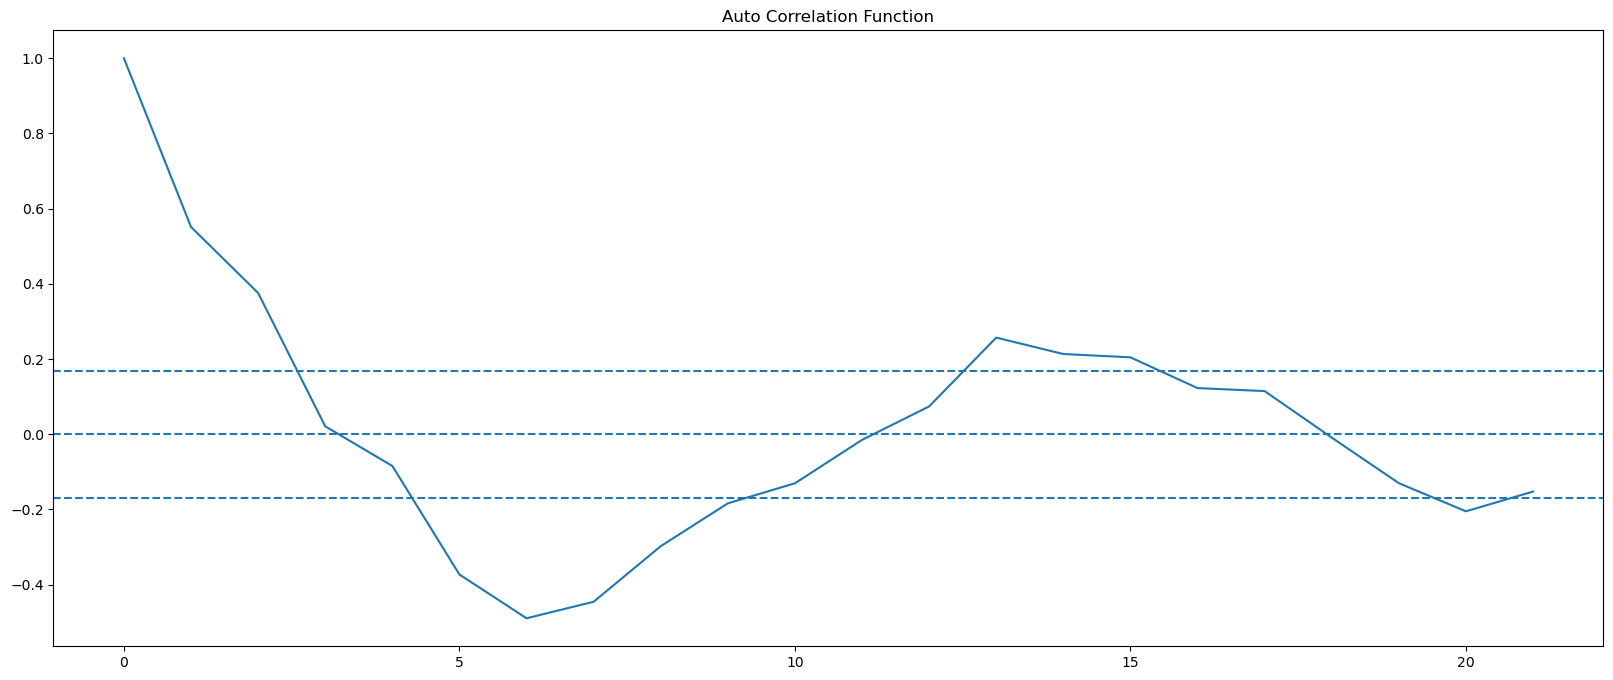

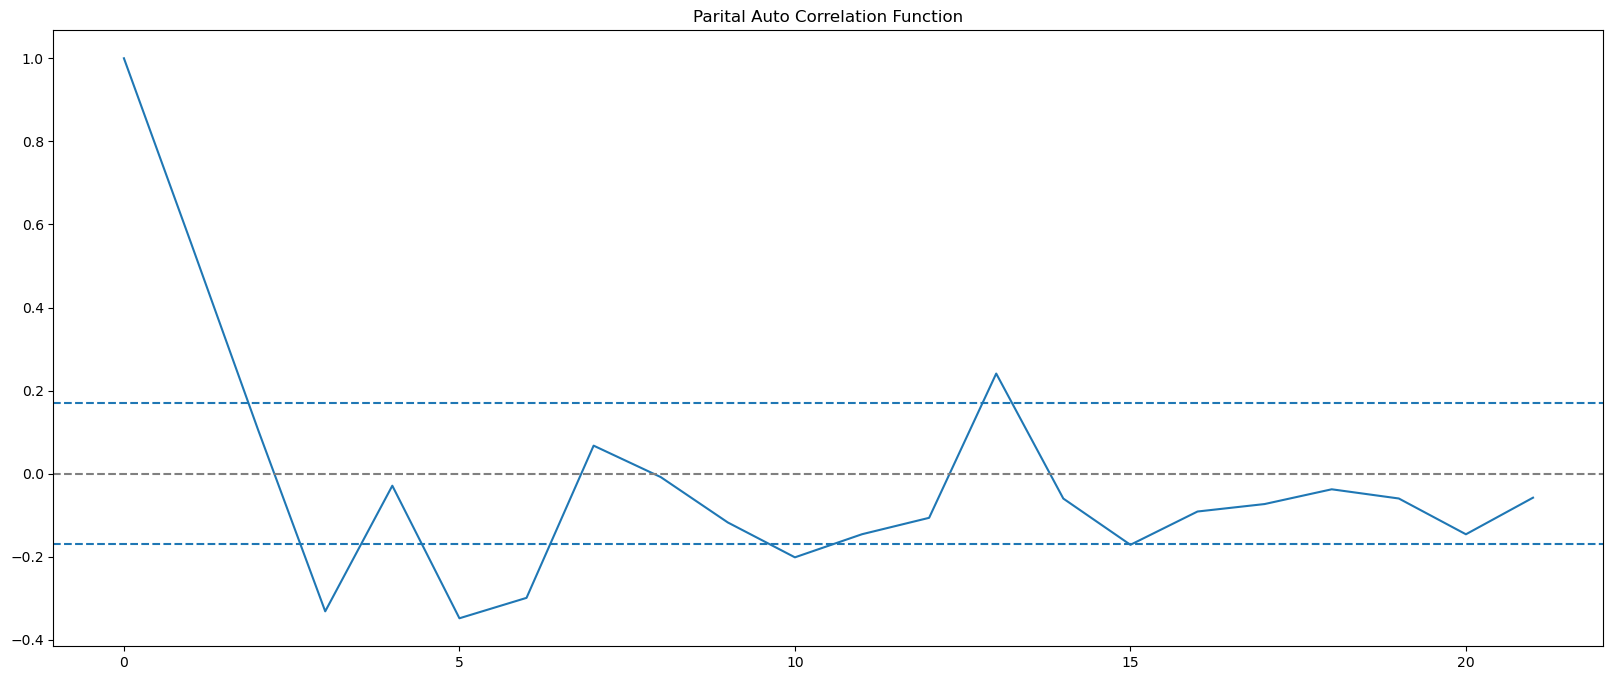

In [161]:
# Plot ACf
plt.figure(figsize=(20,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--')
plt.title('Auto Correlation Function')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--')
plt.title('Parital Auto Correlation Function')
plt.show()

# Inference:
    
we got out P value as 5 and q value as 3

In [162]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


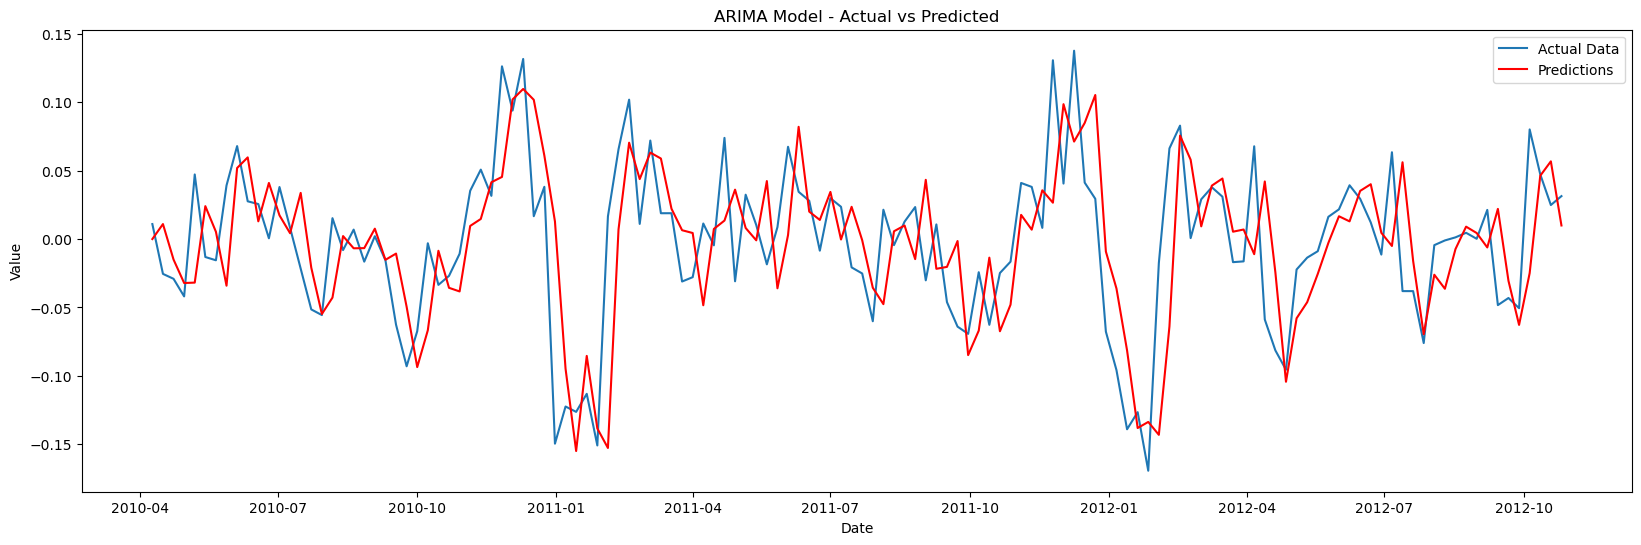

In [163]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.002330021351030462


In [165]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.04827029470627315


# Store Wise Predictions

# Store 1 Sales Forecast

In [166]:
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [167]:
store1_sales.set_index('Date',inplace=True)

In [168]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.102186
p-value                   0.000014
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065


In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [170]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

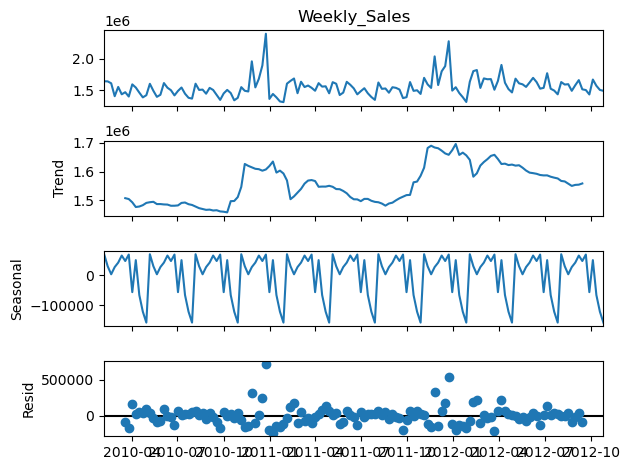

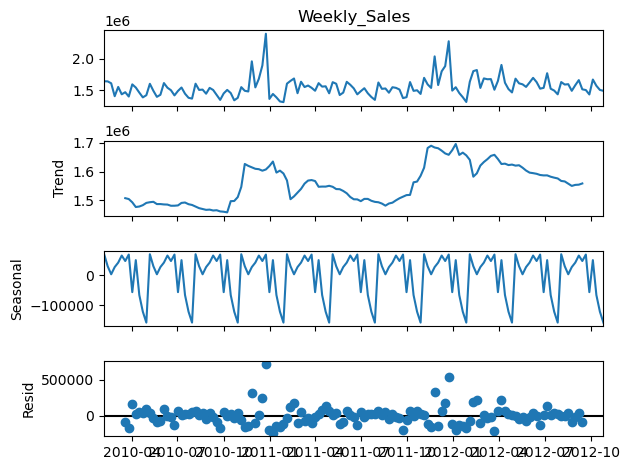

In [171]:
decomposition.plot()

In [172]:
mean1=store1_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store1_sales.rolling(window=10).std() # Creating the Rolling standard deviation

In [174]:
df_log = np.log(store1_sales)
mean_log = df_log.rolling(window = 10).mean()

In [175]:
df_new.dropna(inplace = True)

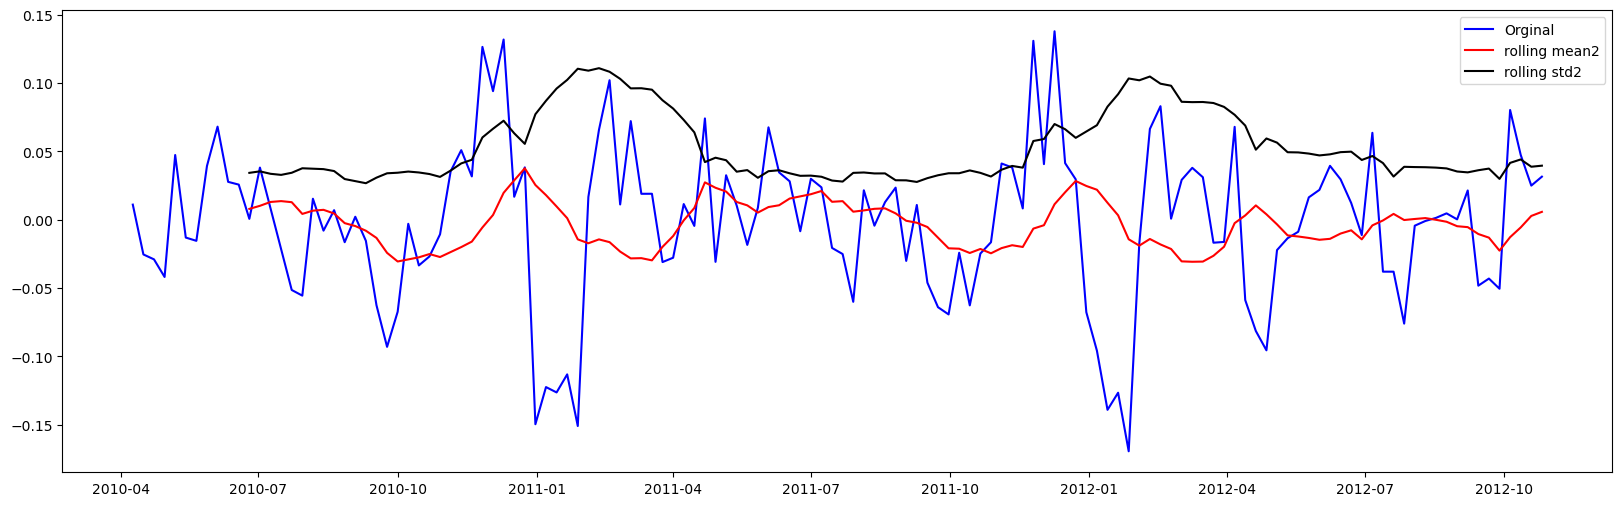

In [176]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

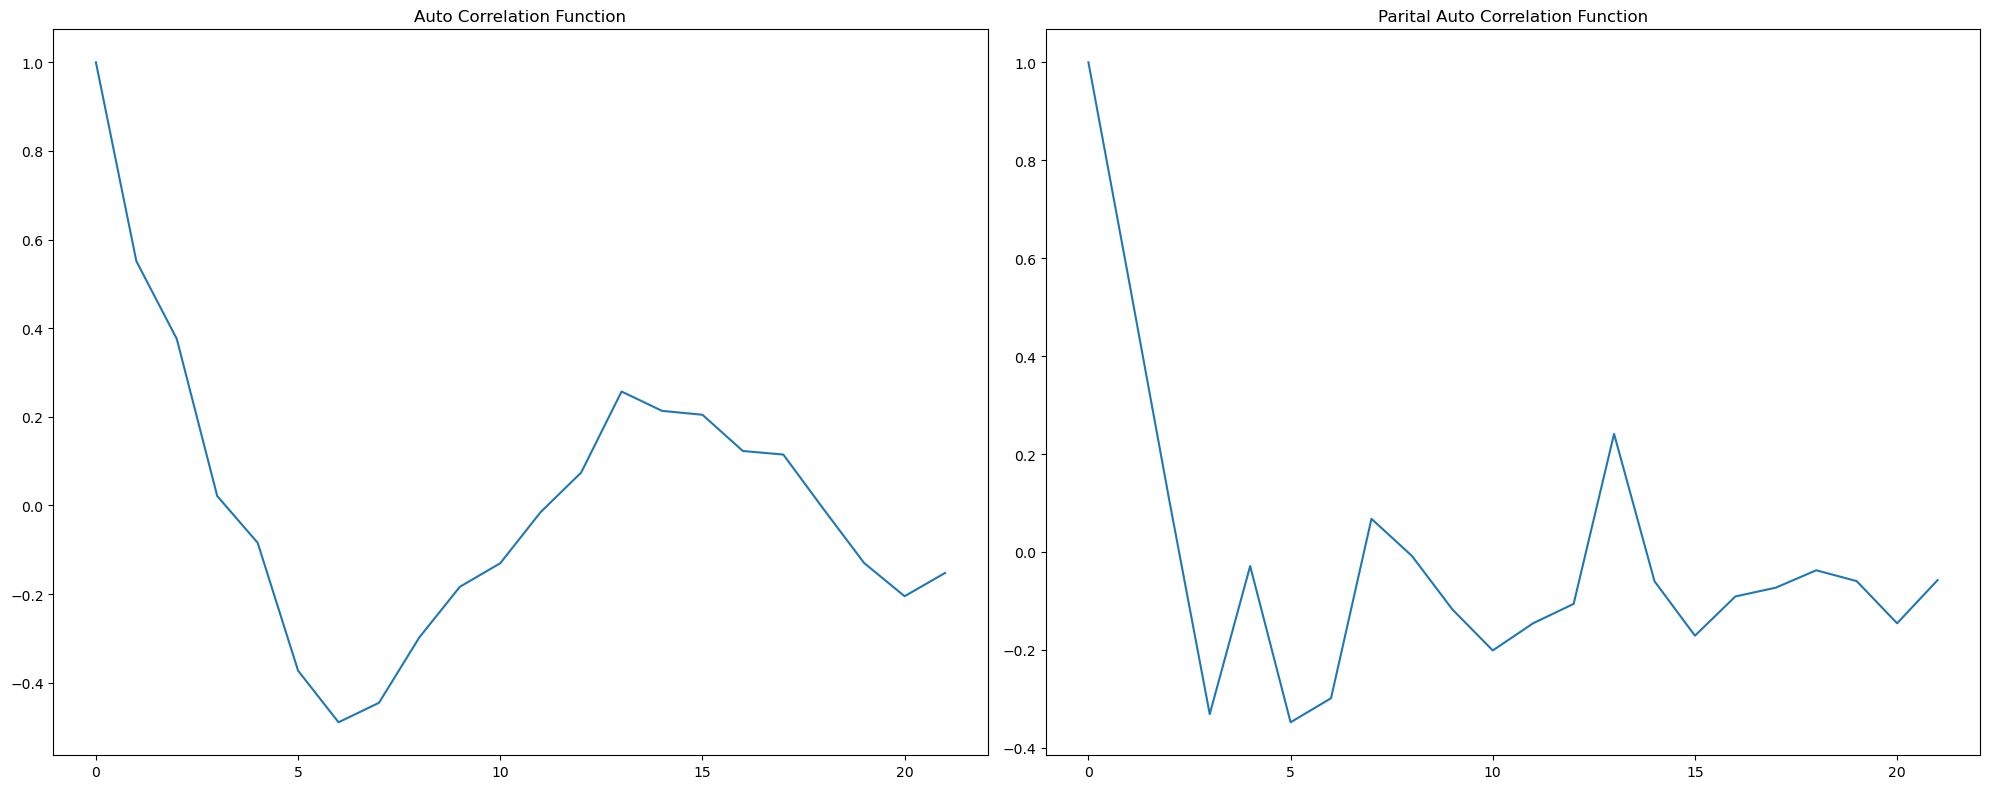

In [177]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [179]:
p, d, q = 2, 1, 2  
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


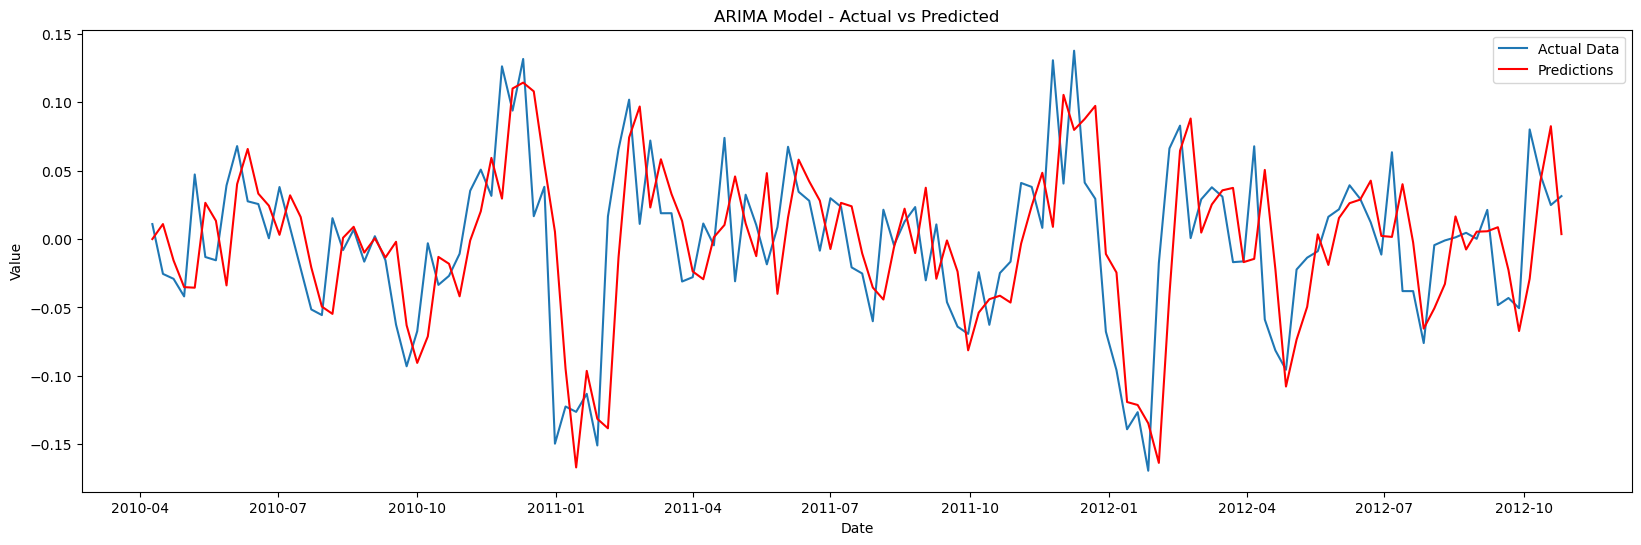

In [180]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0024681940685025577


In [182]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.04968092258103263


In [183]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [184]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [185]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [186]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

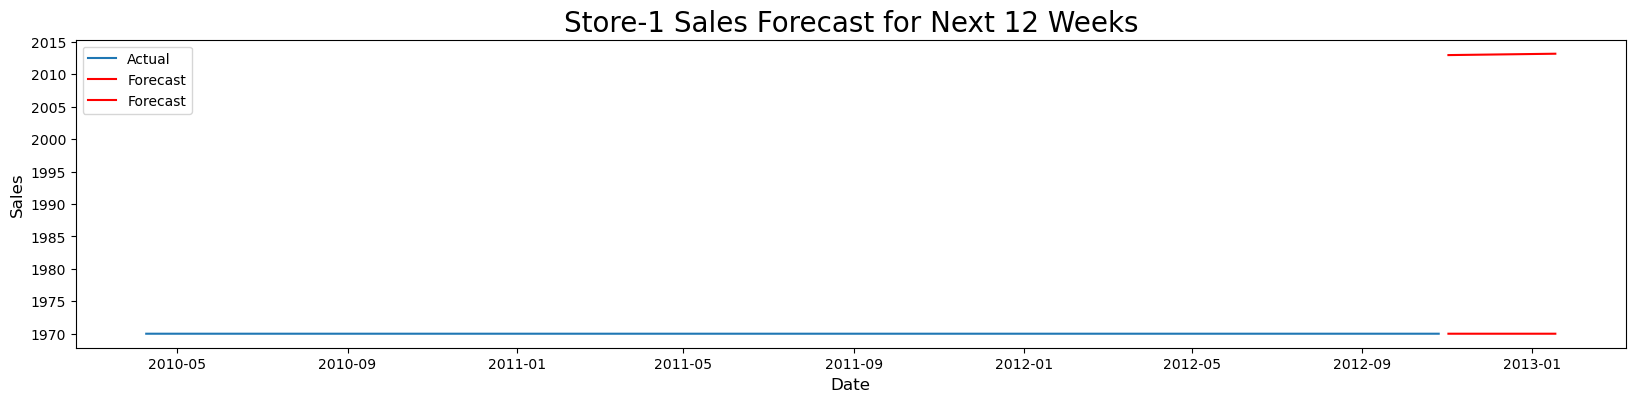

In [187]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [188]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.04968092258103263


# Store 6 Sales Forecast

In [189]:
store6_sales=df[df['Store']==6].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [190]:
store6_sales.set_index('Date',inplace=True)

In [191]:
adf_test(store6_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.294330
p-value                   0.000006
# lags used               4.000000
# observations          137.000000
critical value (1%)      -3.479007
critical value (5%)      -2.882878
critical value (10%)     -2.578149


Figure(640x480)


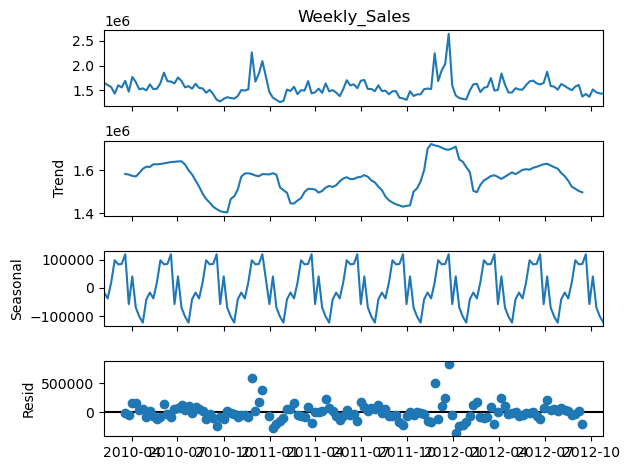

In [193]:
decomposition=seasonal_decompose(store6_sales['Weekly_Sales'],period=13)
print(decomposition.plot())

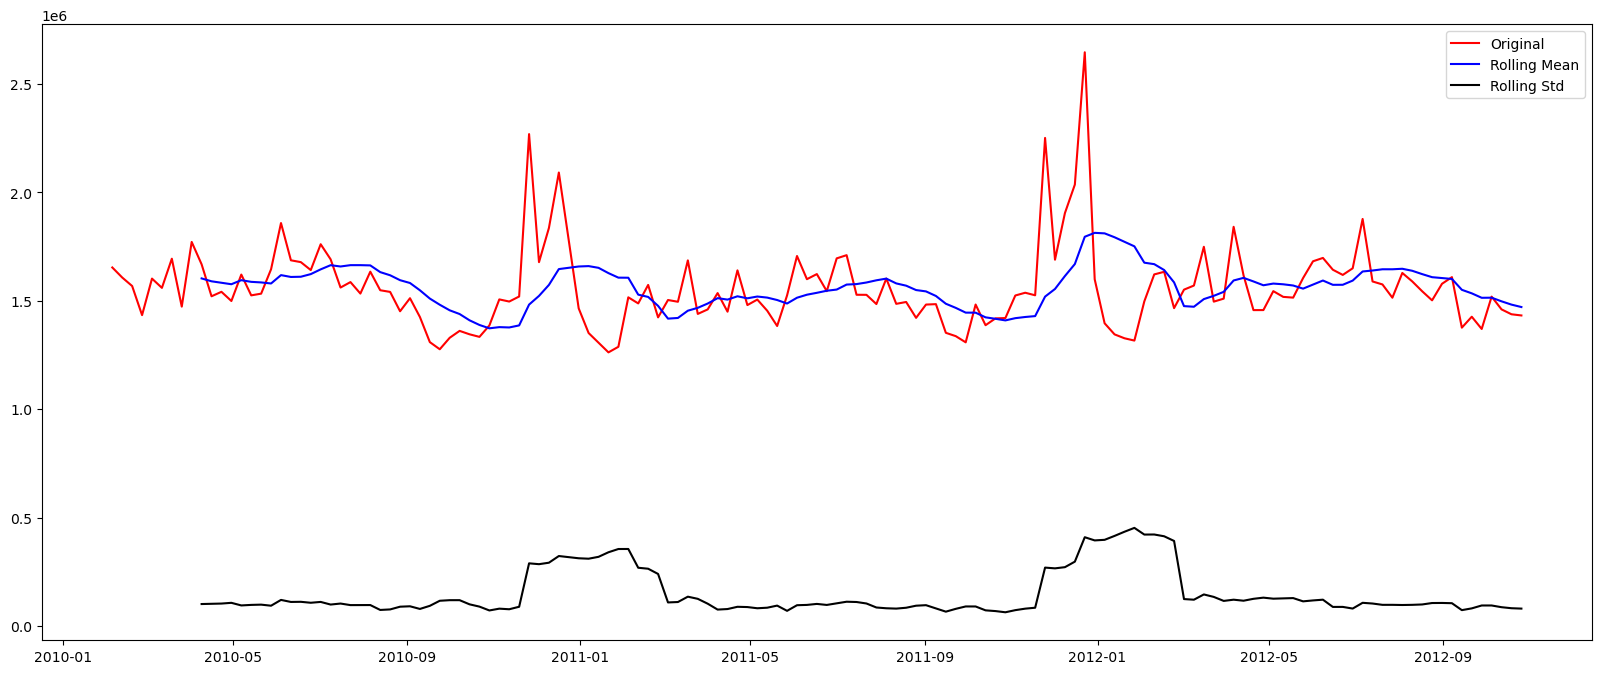

In [195]:
mean1=store6_sales.rolling(window=10).mean()
std1=store6_sales.rolling(window=10).std()
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store6_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend()
plt.show()

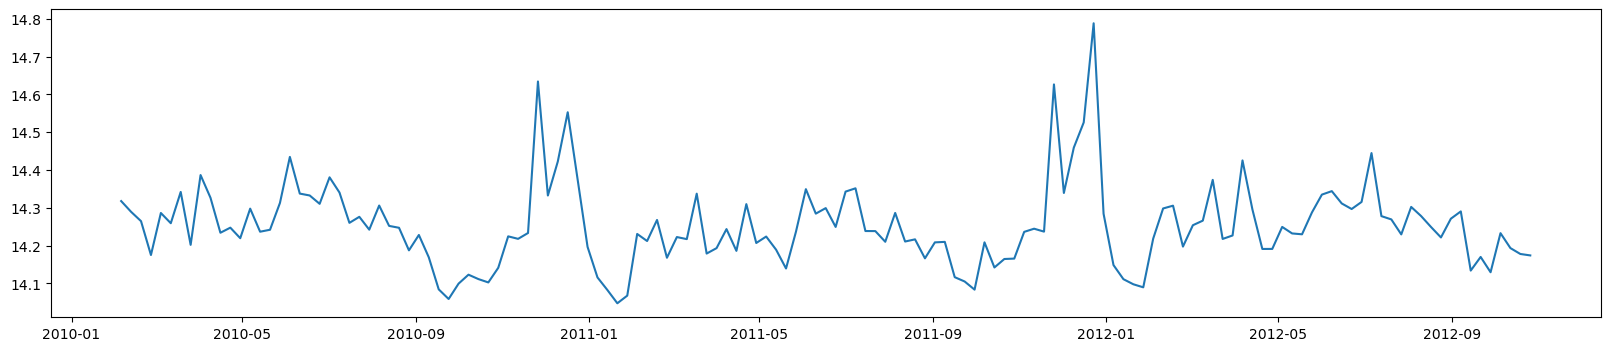

In [196]:
df_log = np.log(store6_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

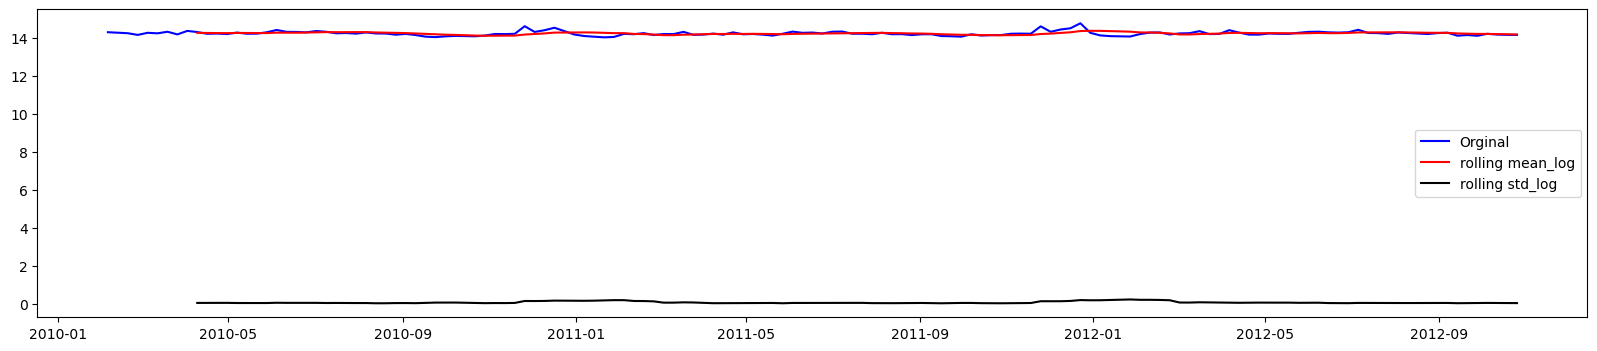

In [197]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend()
plt.show()

In [198]:
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [199]:
df_new.dropna(inplace = True)

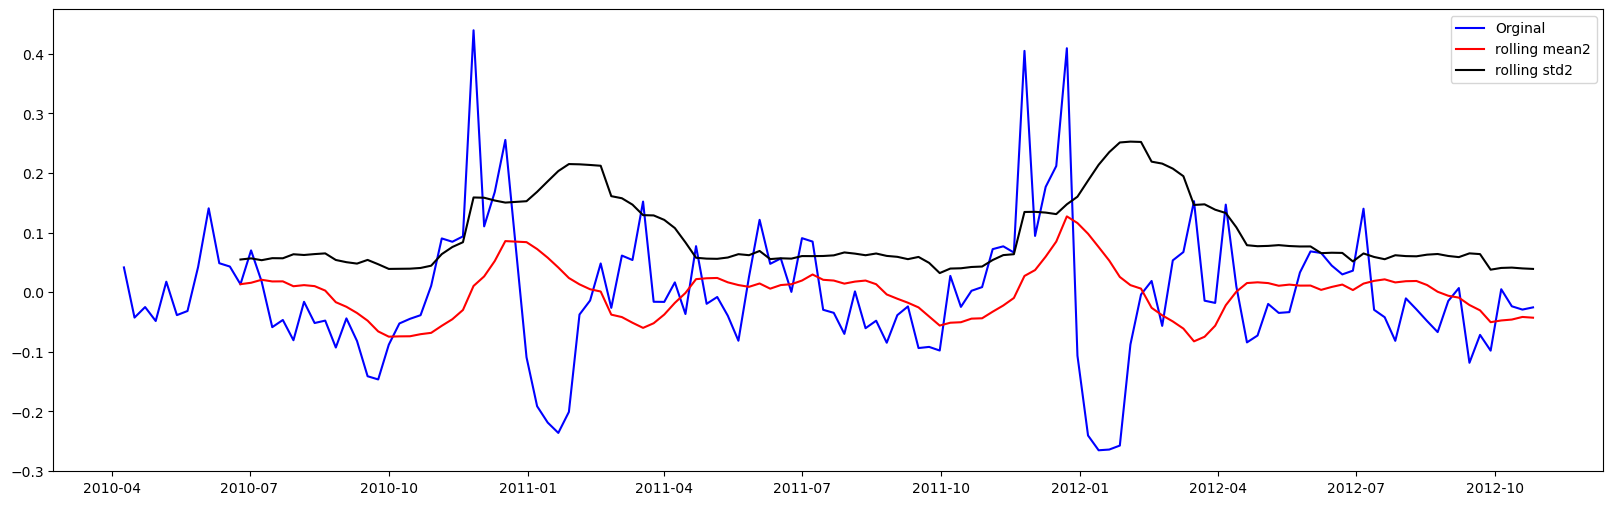

In [200]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend()
plt.show()

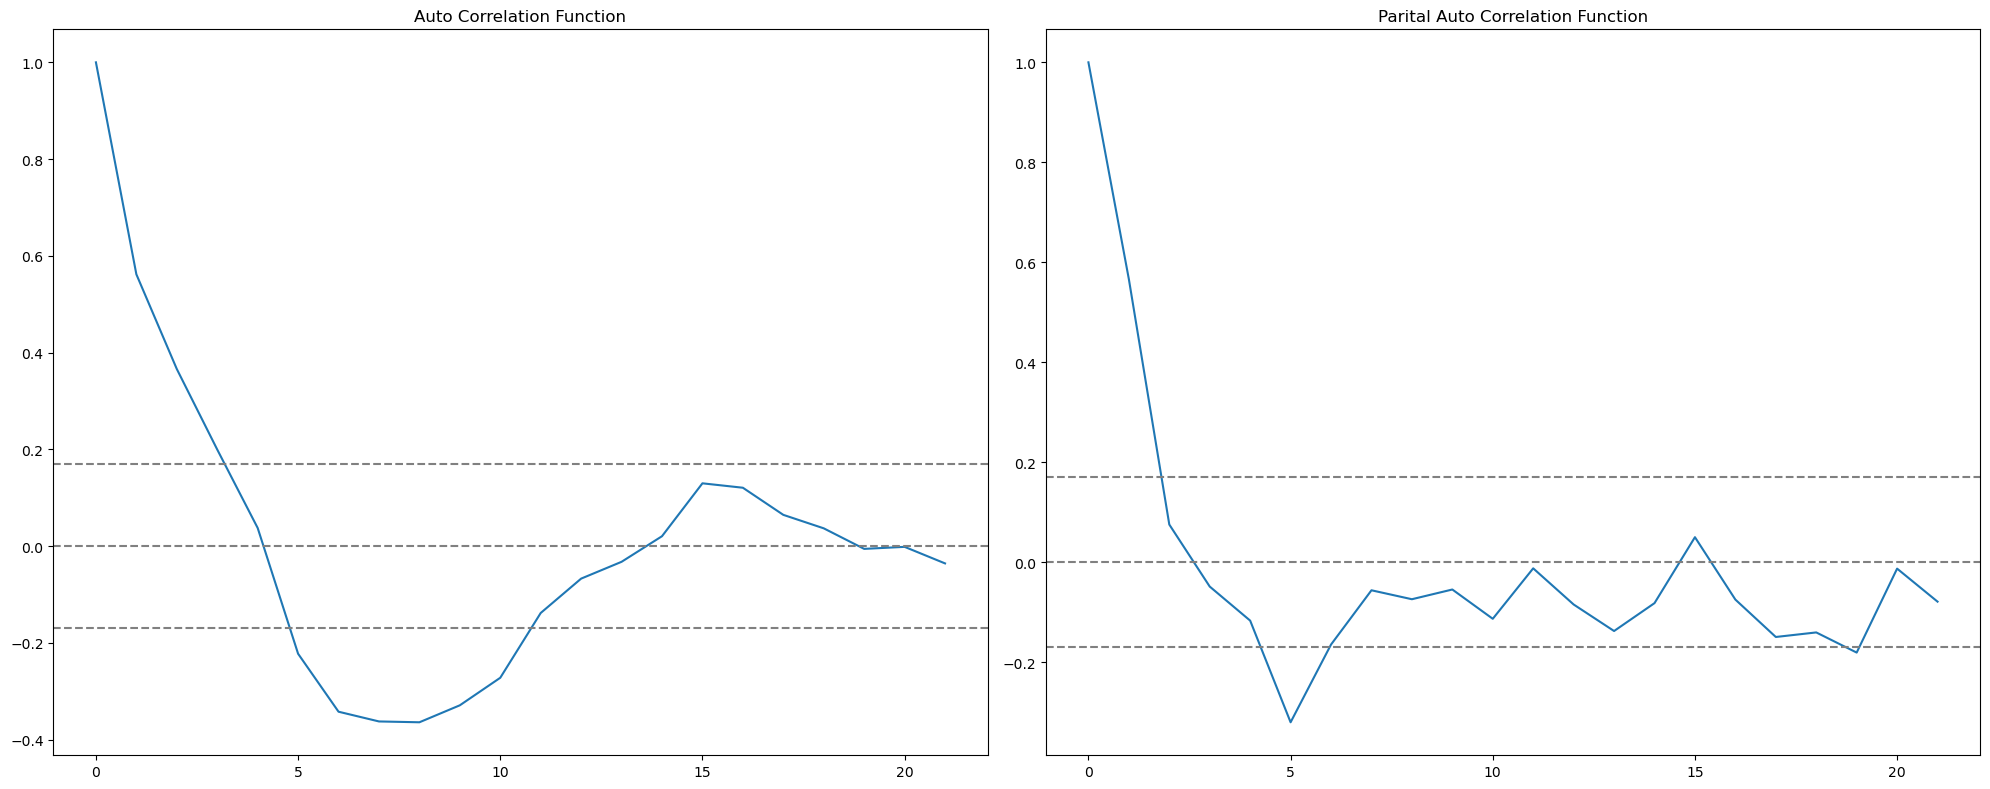

In [201]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [202]:
#pdq values are 4,1,3
p, d, q = 4, 1, 3  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


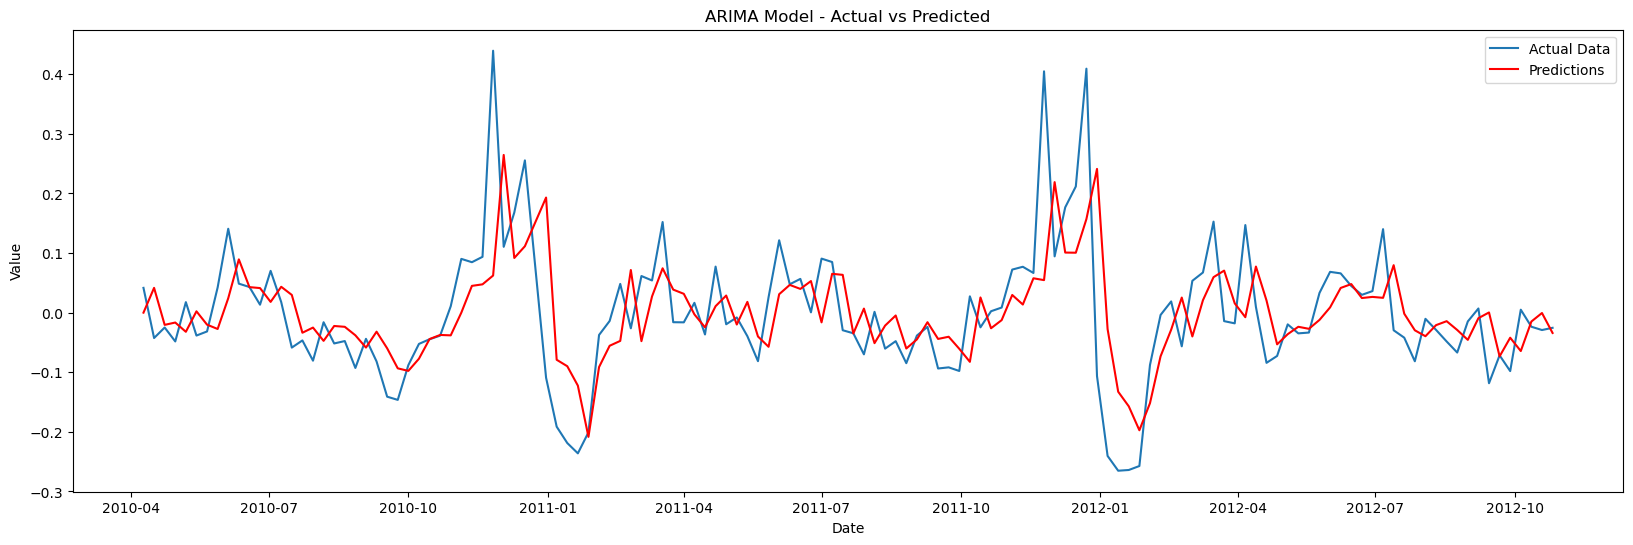

In [203]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [204]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0083852401694443


In [205]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.09157095701937541


In [206]:
forecast_steps = 12 
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [207]:
end_date_actual_data = '2012-12-10' 
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [208]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [209]:
forecast_df.set_index('Date',inplace=True)

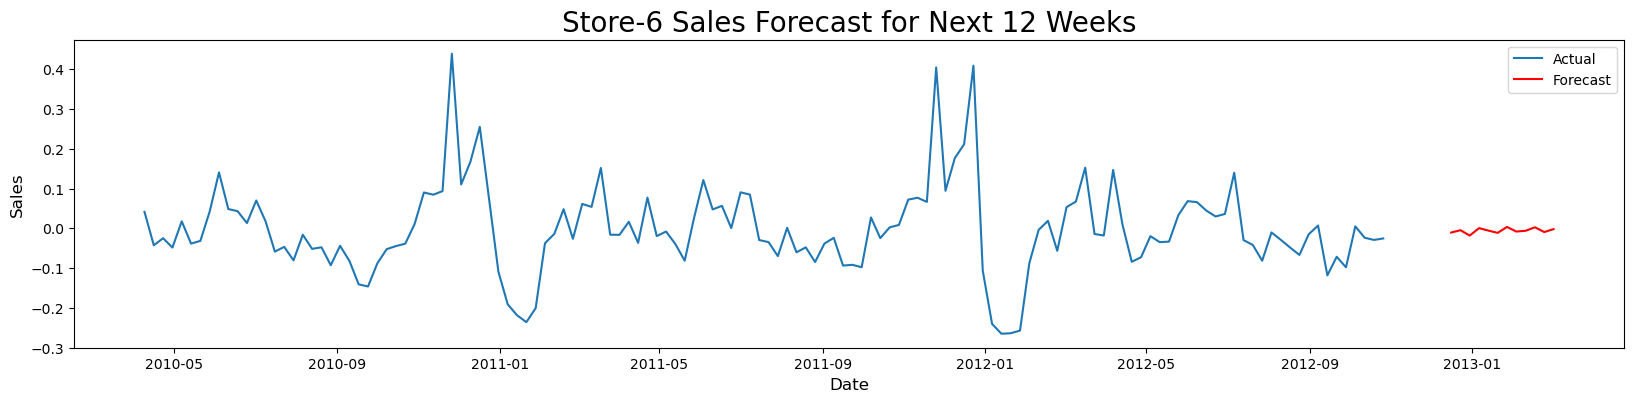

In [210]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-6 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [211]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.09157095701937541


# THANK YOU